In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dim_empreendimentos = pd.read_csv(
    "data/dim_empreendimento.csv",
    delimiter=";",
    encoding="UTF-8")

dim_regiao = pd.read_csv(
    "data/dim_regiao.csv",
    delimiter=";",
    encoding="UTF-8")

fato_dados_metereologicos = pd.read_csv(
    "data/fato_dados_meteorologicos.csv",
    delimiter=";",
    encoding="UTF-8")

fato_geracao = pd.read_csv(
    "data/fato_geracao.csv",
    delimiter=";",
    encoding="UTF-8",
    decimal=',')

In [2]:
merge = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')

merge['SigTipoGeracao'].replace({
    'UTN': 'Usina Termonuclear',
    'UTE': 'Usina Termelétrica',
    'UHE': 'Usina Hidrelétrica',
    'UFV': 'Central Geradora Solar Fotovoltaica',
    'PCH': 'Pequena Central Hidrelétrica',
    'EOL': 'Central Geradora Eólica',
    'CGU': 'Central Geradora Undi-elétrica',
    'CGH': 'Central Geradora Hidrelétrica'
}, inplace=True)

somas = merge.groupby(['SigUFPrincipal', 'SigTipoGeracao']).agg({'MdaPotenciaOutorgadaKw': 'sum'})

somas['MdaPotenciaOutorgadaKw'] = pd.to_numeric(somas['MdaPotenciaOutorgadaKw'])

maiores_valores = somas.groupby(['SigUFPrincipal'])['MdaPotenciaOutorgadaKw'].idxmax()

maiores_geradores = somas.loc[maiores_valores]

maiores_geradores

,,MdaPotenciaOutorgadaKw
SigUFPrincipal,SigTipoGeracao,
AC,Usina Termelétrica,142170.00
AL,Central Geradora Solar Fotovoltaica,531624.00
AM,Usina Termelétrica,2216523.80
AP,Usina Hidrelétrica,941950.00
BA,Central Geradora Eólica,16953370.64
CE,Central Geradora Solar Fotovoltaica,8463056.00
DF,Usina Hidrelétrica,30000.00
ES,Usina Termelétrica,1221222.40
GO,Usina Hidrelétrica,5436627.00


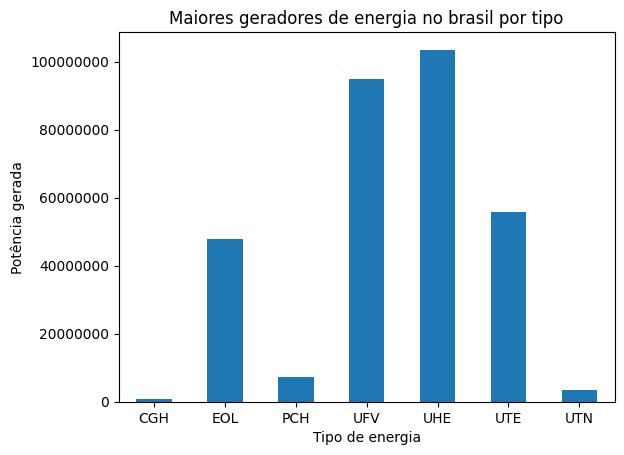

In [3]:
merge = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')
pd.options.display.float_format = '{:.2f}'.format
grouped = merge.groupby('SigTipoGeracao')['MdaPotenciaOutorgadaKw'].sum()

grouped.plot.bar(rot=0)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("Maiores geradores de energia no brasil por tipo")
plt.xlabel("Tipo de energia")
plt.ylabel("Potência gerada")
plt.show()

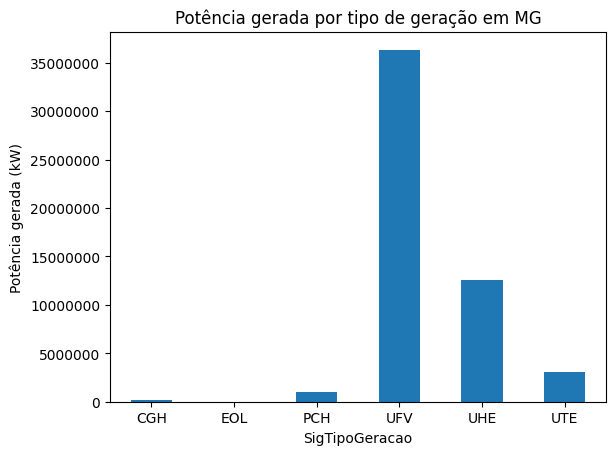

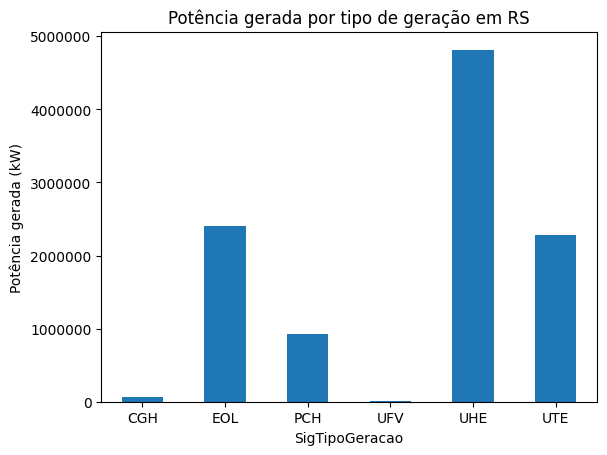

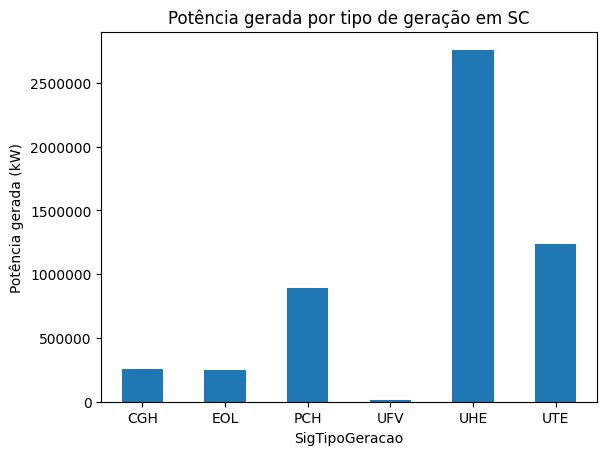

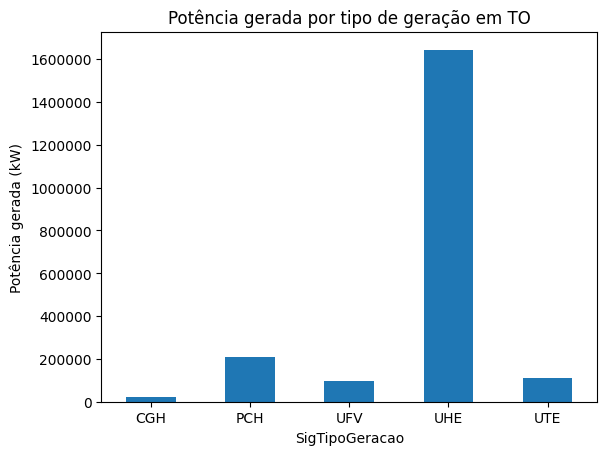

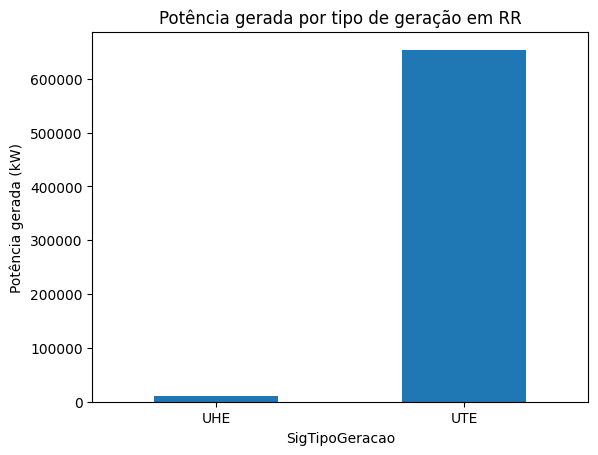

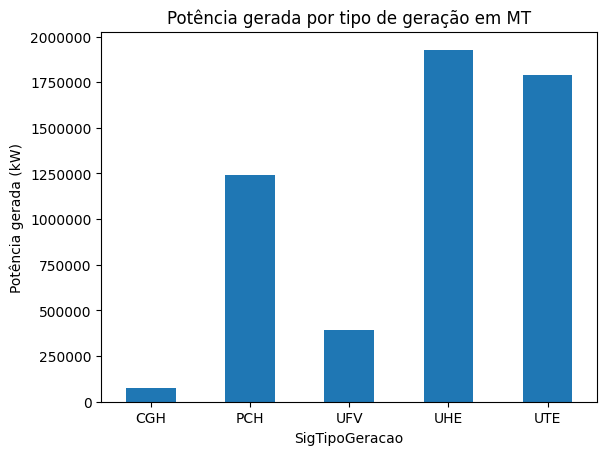

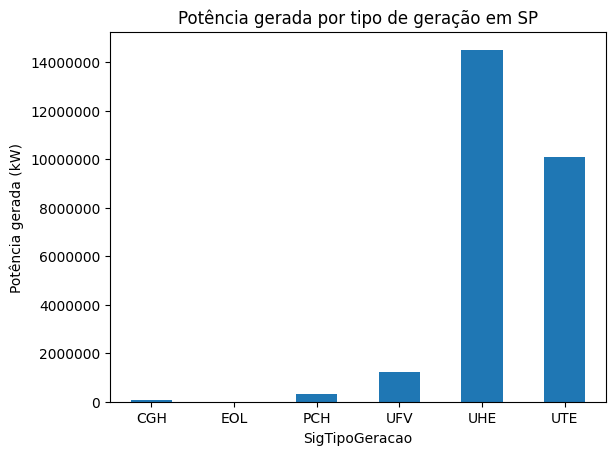

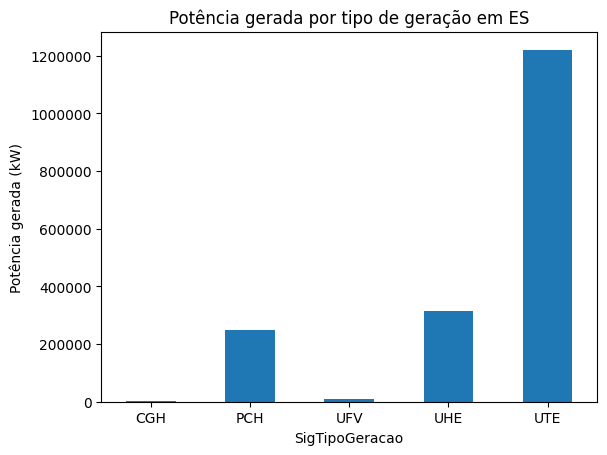

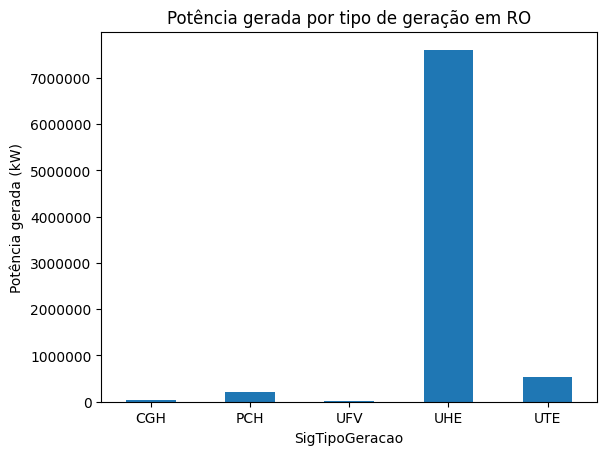

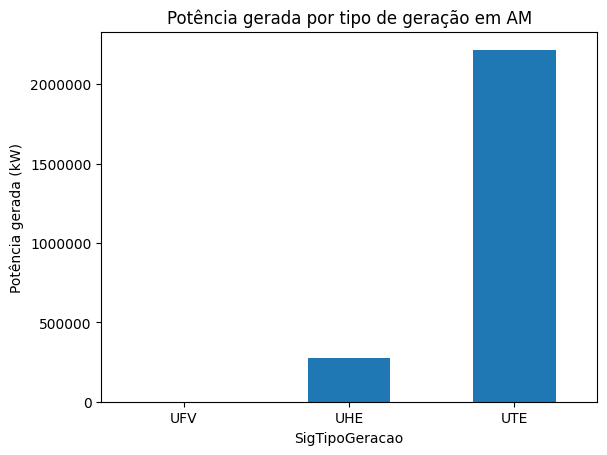

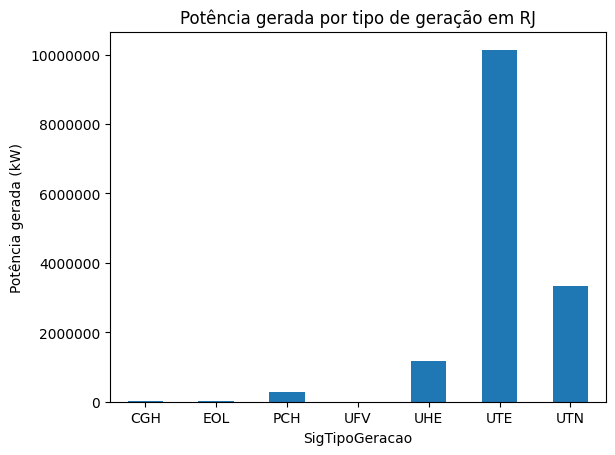

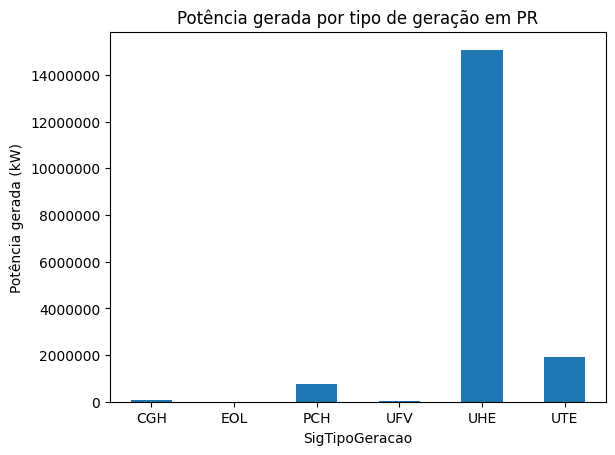

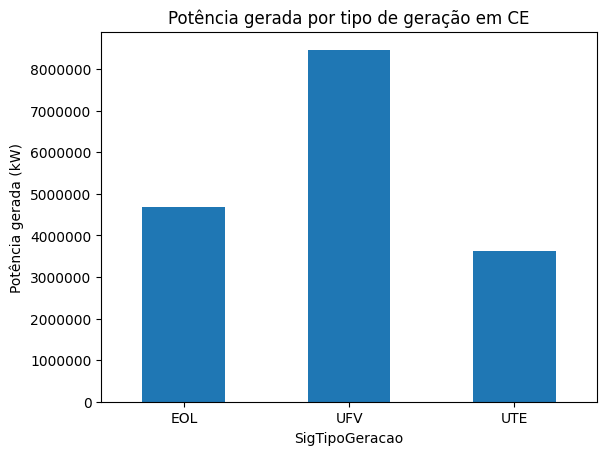

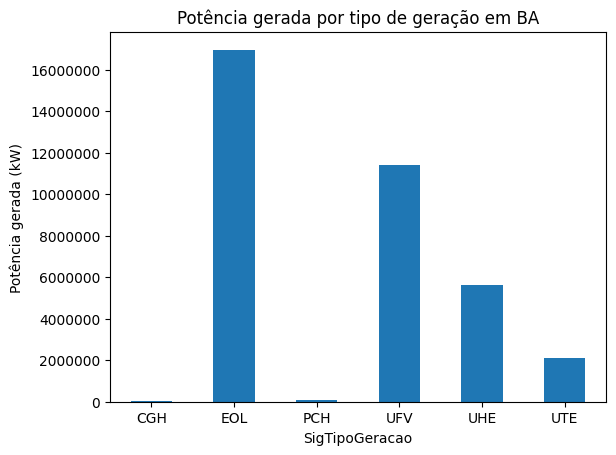

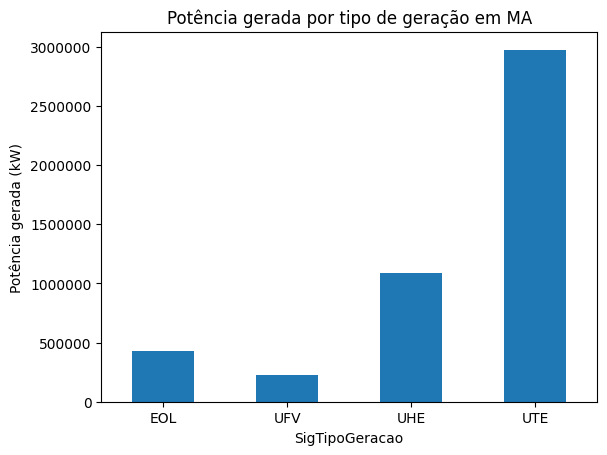

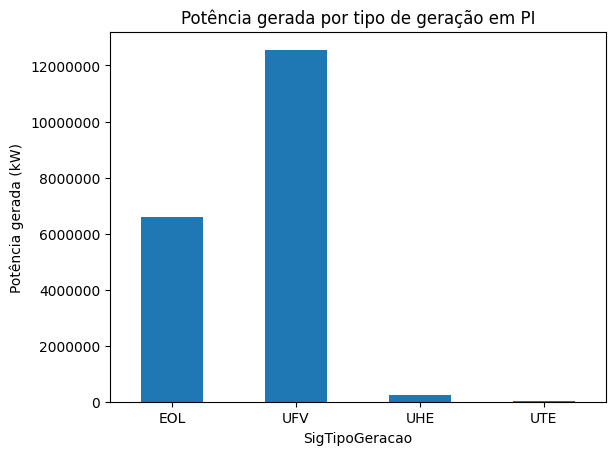

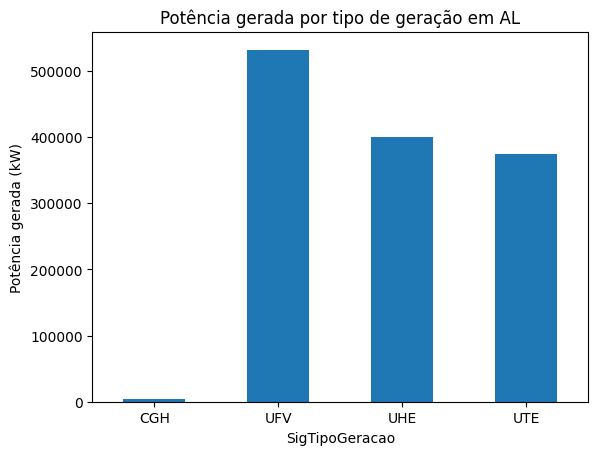

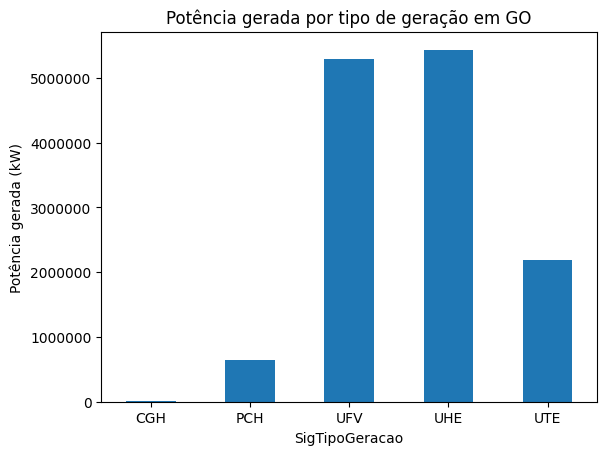

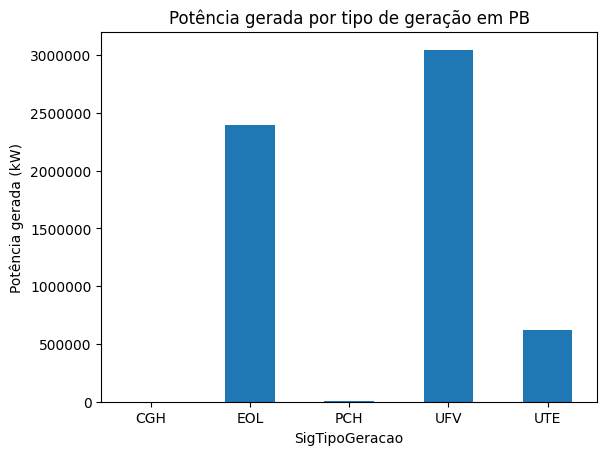

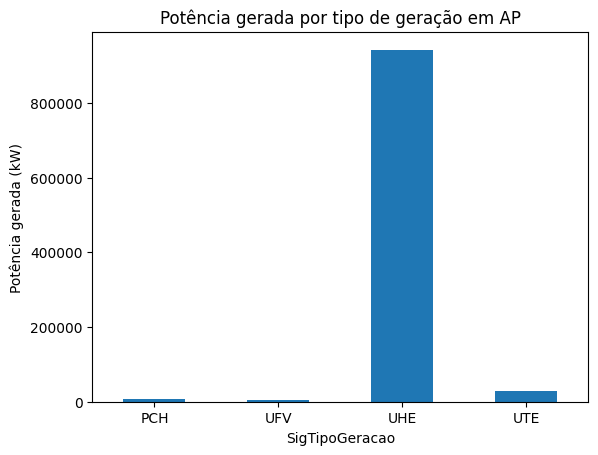

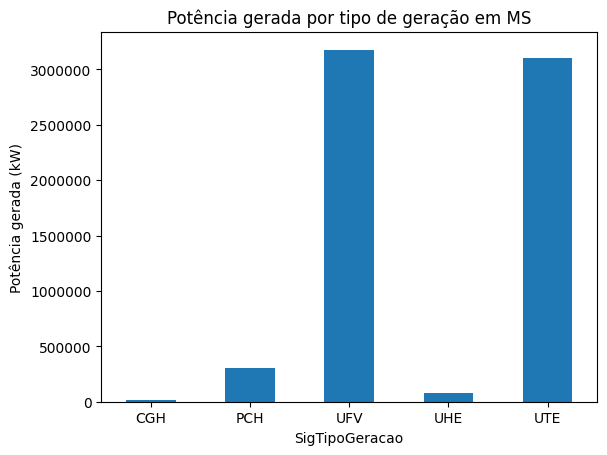

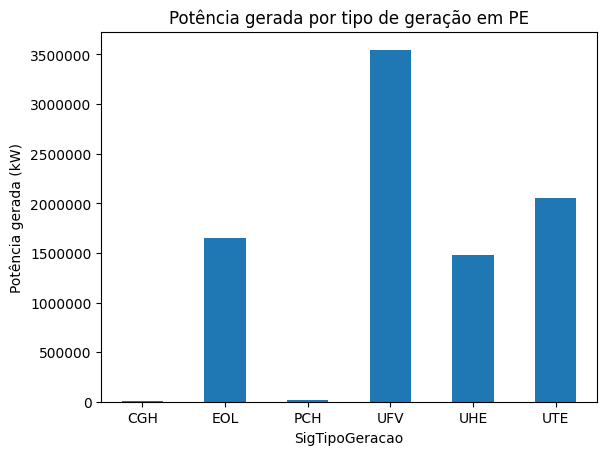

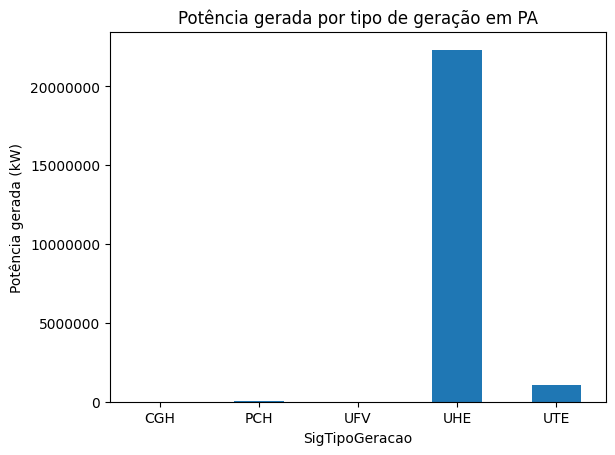

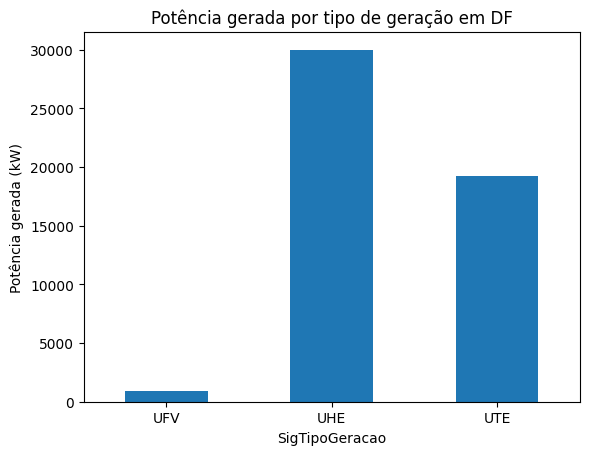

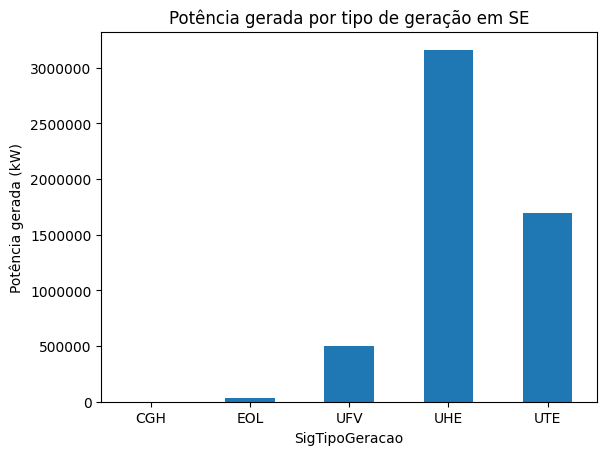

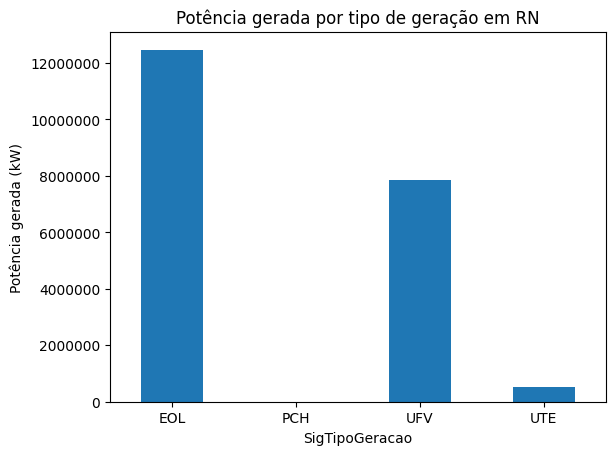

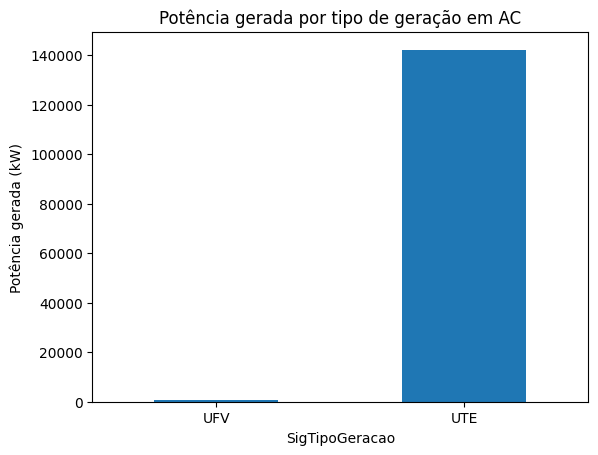

In [4]:
ufs = merge['SigUFPrincipal'].unique()
for uf in ufs:
    data = merge[merge['SigUFPrincipal'] == uf]

    grouped = data.groupby('SigTipoGeracao')['MdaPotenciaOutorgadaKw'].sum()

    fig, axs = plt.subplots()
    grouped.plot.bar(rot=0, ax=axs)
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    axs.set_title(f'Potência gerada por tipo de geração em {uf}')
    axs.set_ylabel('Potência gerada (kW)')

    plt.show()

In [5]:
# Junção dos arquivos
merge_columns = ['UF', 'precipTotalHorario', 'ventoVeloHoraria', 'tempAr', 'radGlobal', 'umidRelAr']
bar_columns = ['precipTotalHorario', 'ventoVeloHoraria', 'tempAr', 'radGlobal', 'umidRelAr']
df = pd.merge(dim_regiao, fato_dados_metereologicos, left_on='id', right_on='id_regiao')[merge_columns]

for column in merge_columns[1:]:
    df[column].fillna(df[column].mean(), inplace=True)

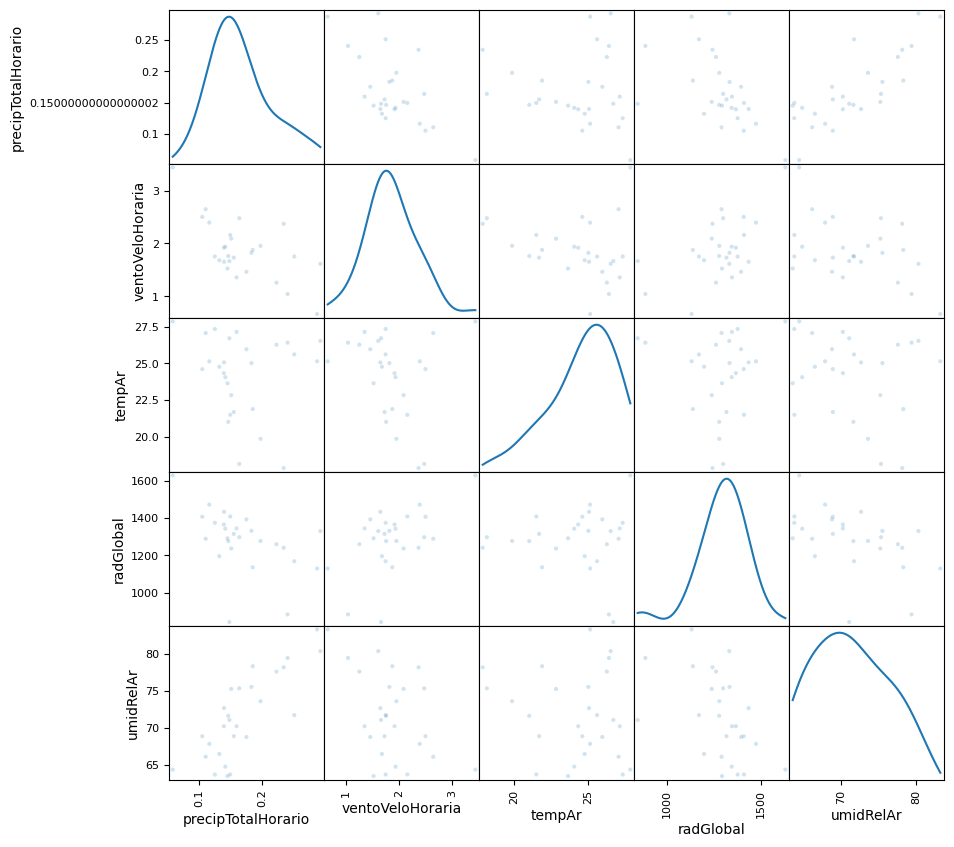

In [6]:
df_grouped_mean_uf = df.groupby('UF').mean()

pd.plotting.scatter_matrix(df_grouped_mean_uf, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

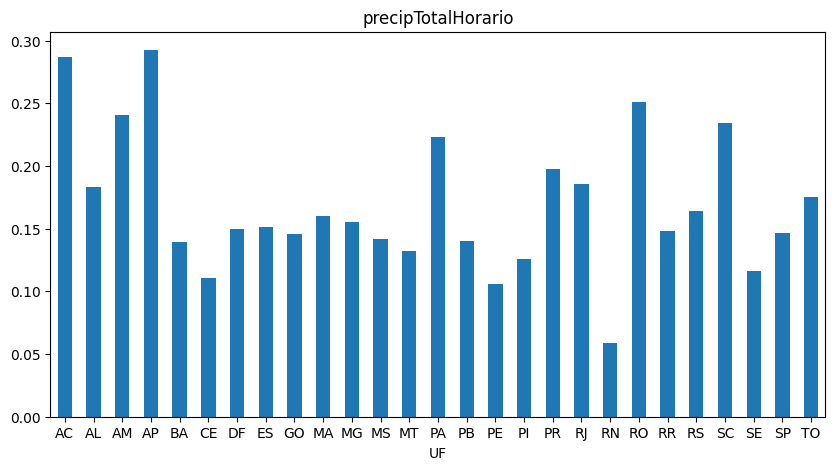

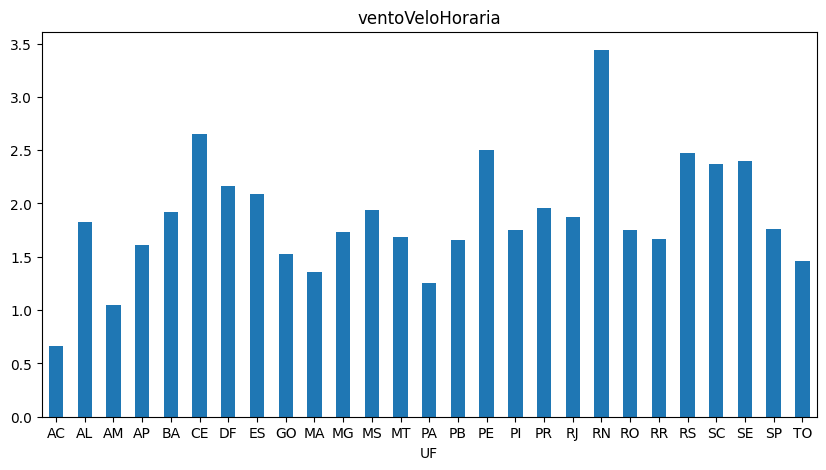

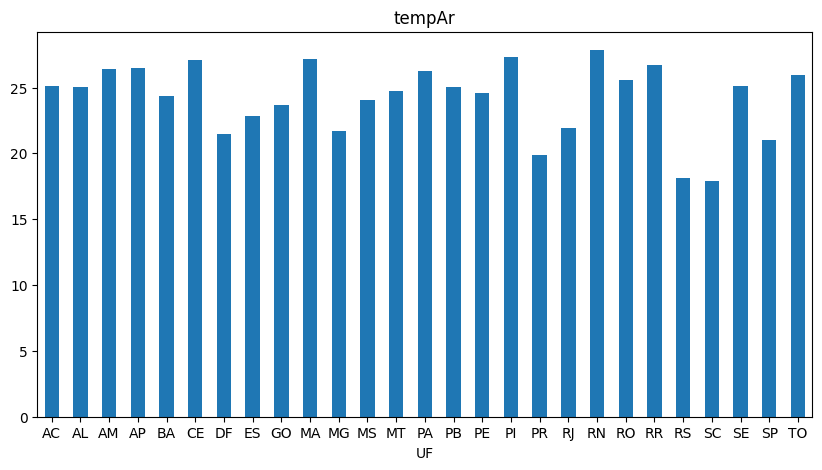

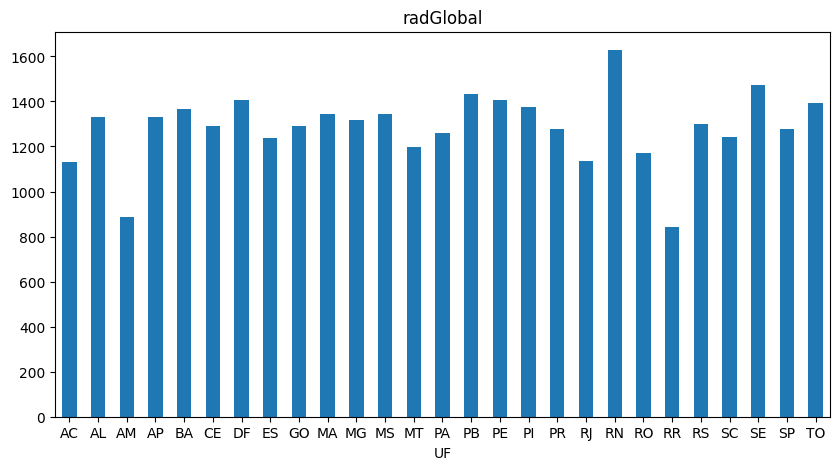

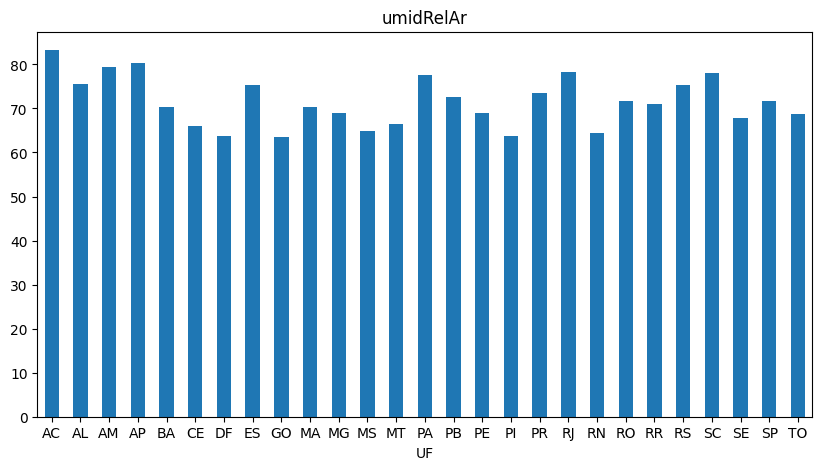

In [7]:
for column in df_grouped_mean_uf.columns:
    plt.figure()
    df_grouped_mean_uf[column].plot.bar(rot=0, figsize=(10,5))
    plt.title(column)
    plt.show()

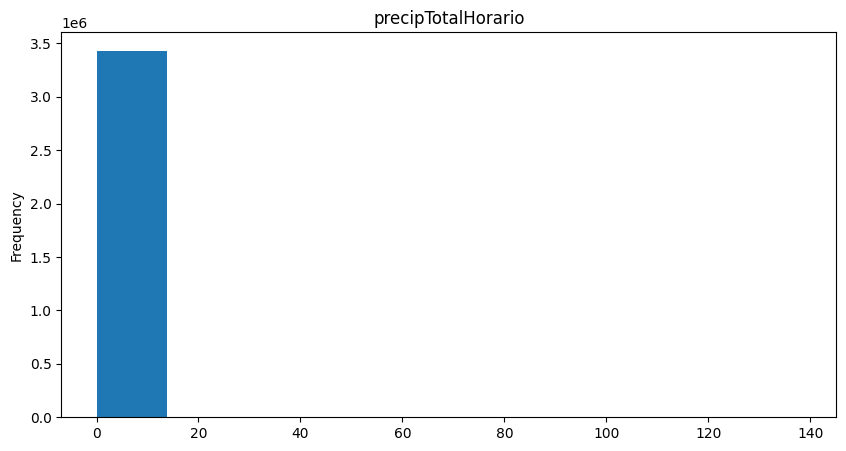

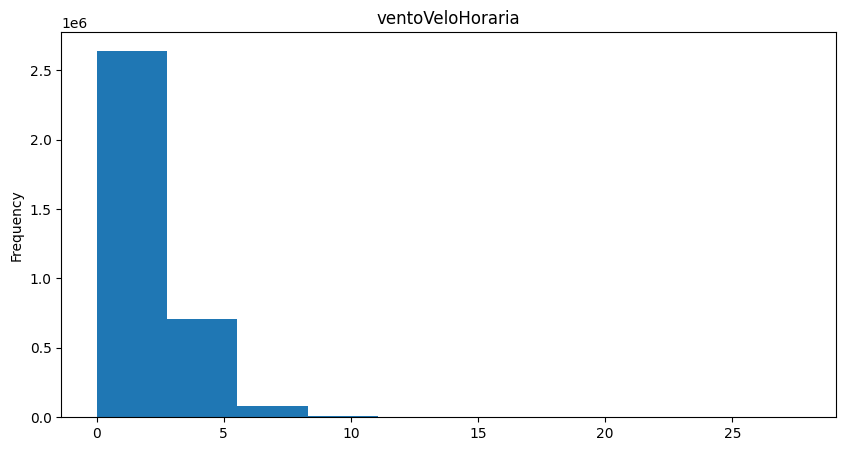

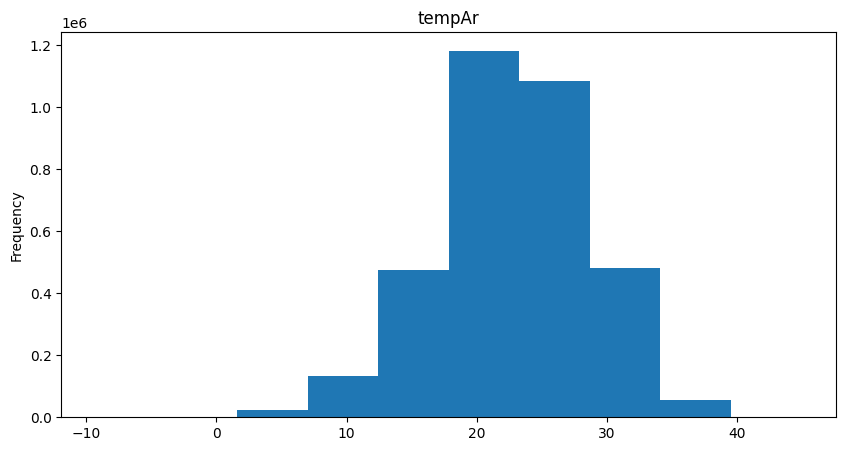

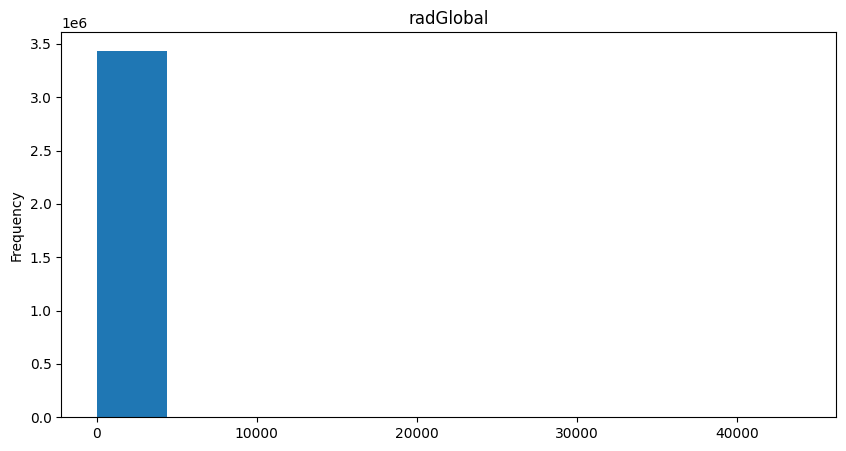

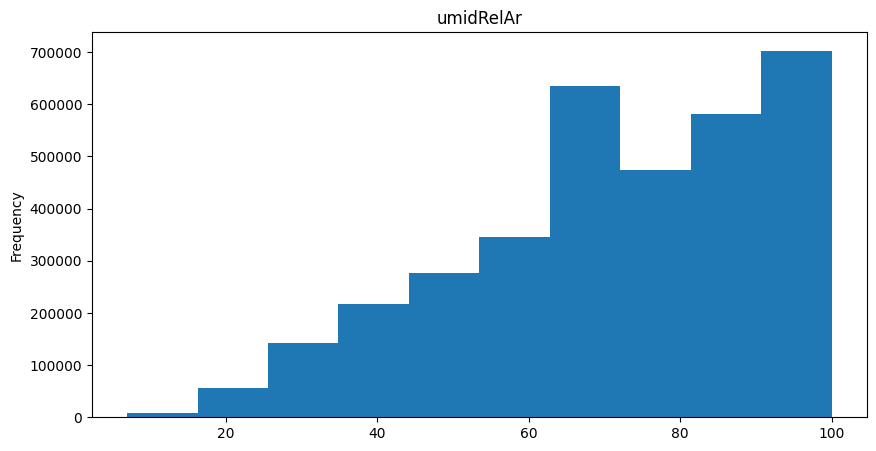

In [8]:
# df_grouped['precipTotalHorario'].shift().drop_duplicates()
for column in bar_columns:
    plt.figure()
    df[column].plot.hist(rot=0, figsize=(10,5))
    plt.title(column)
    plt.show()

/tmp/ipykernel_20303/227228162.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 2)


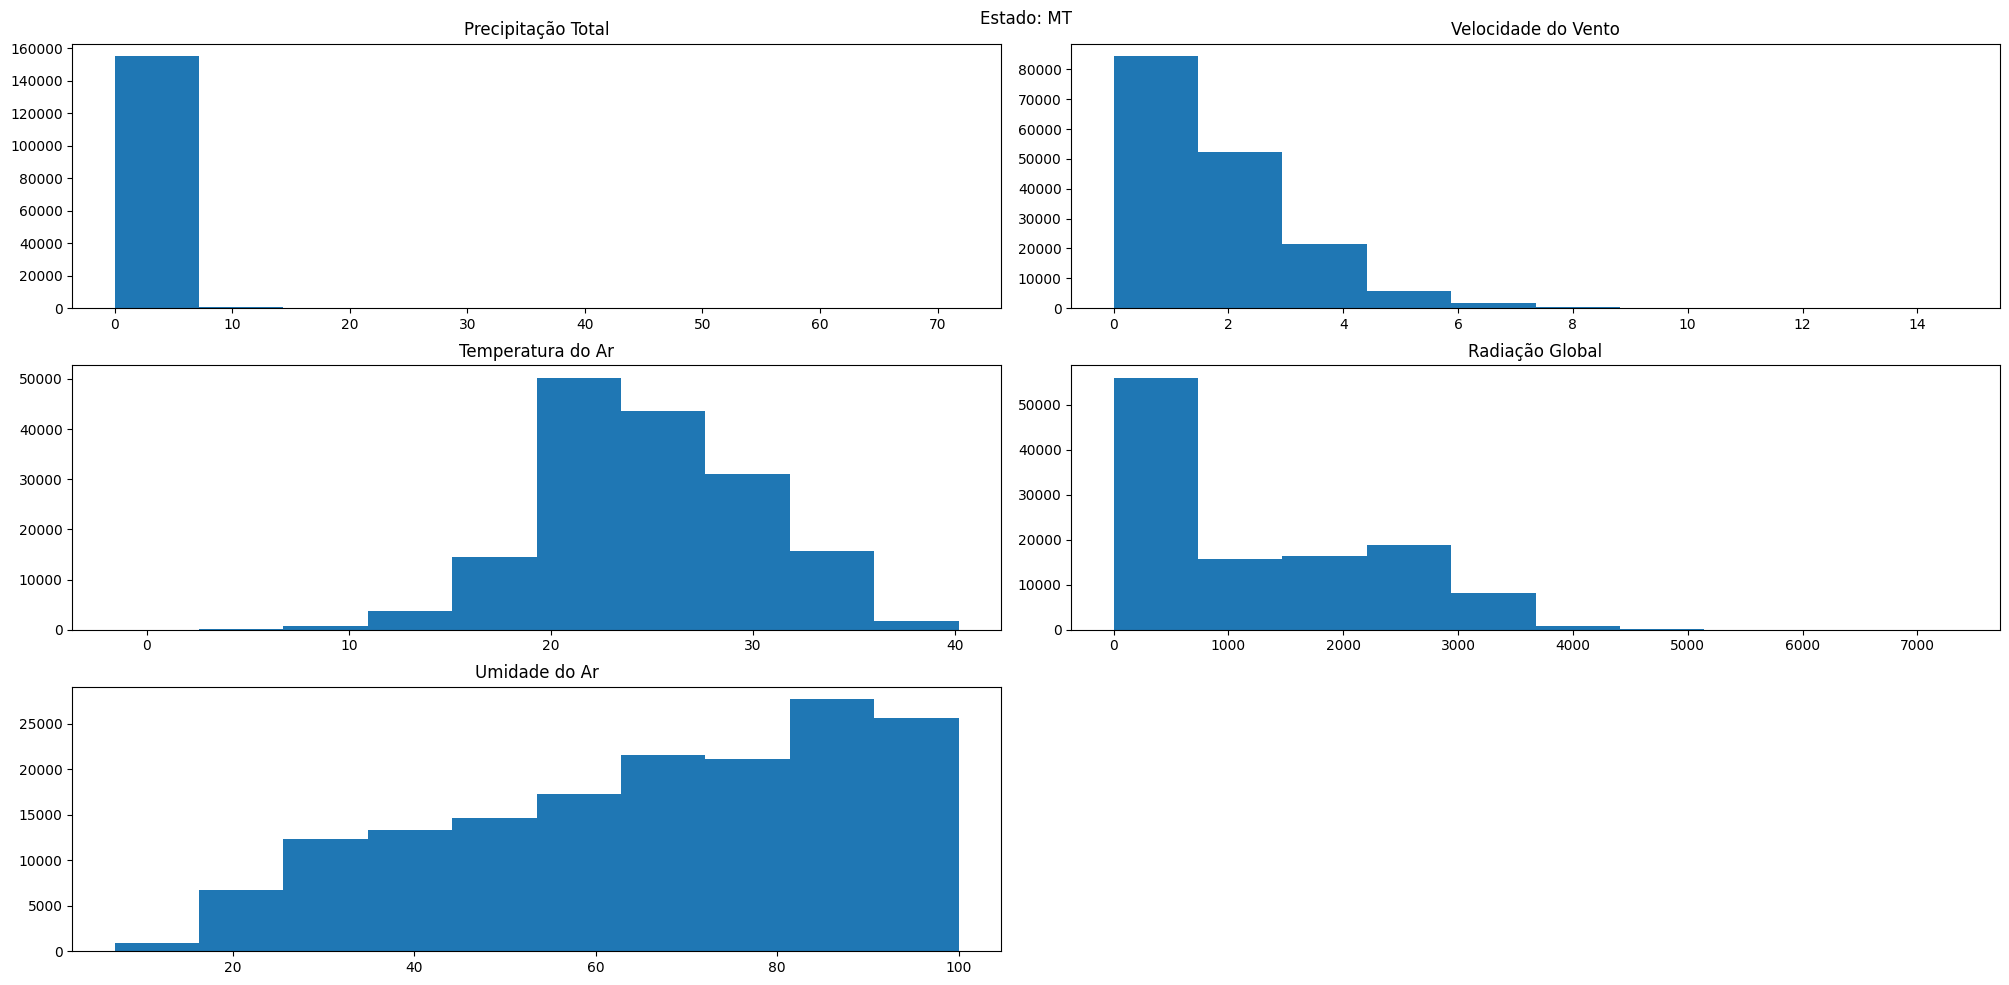

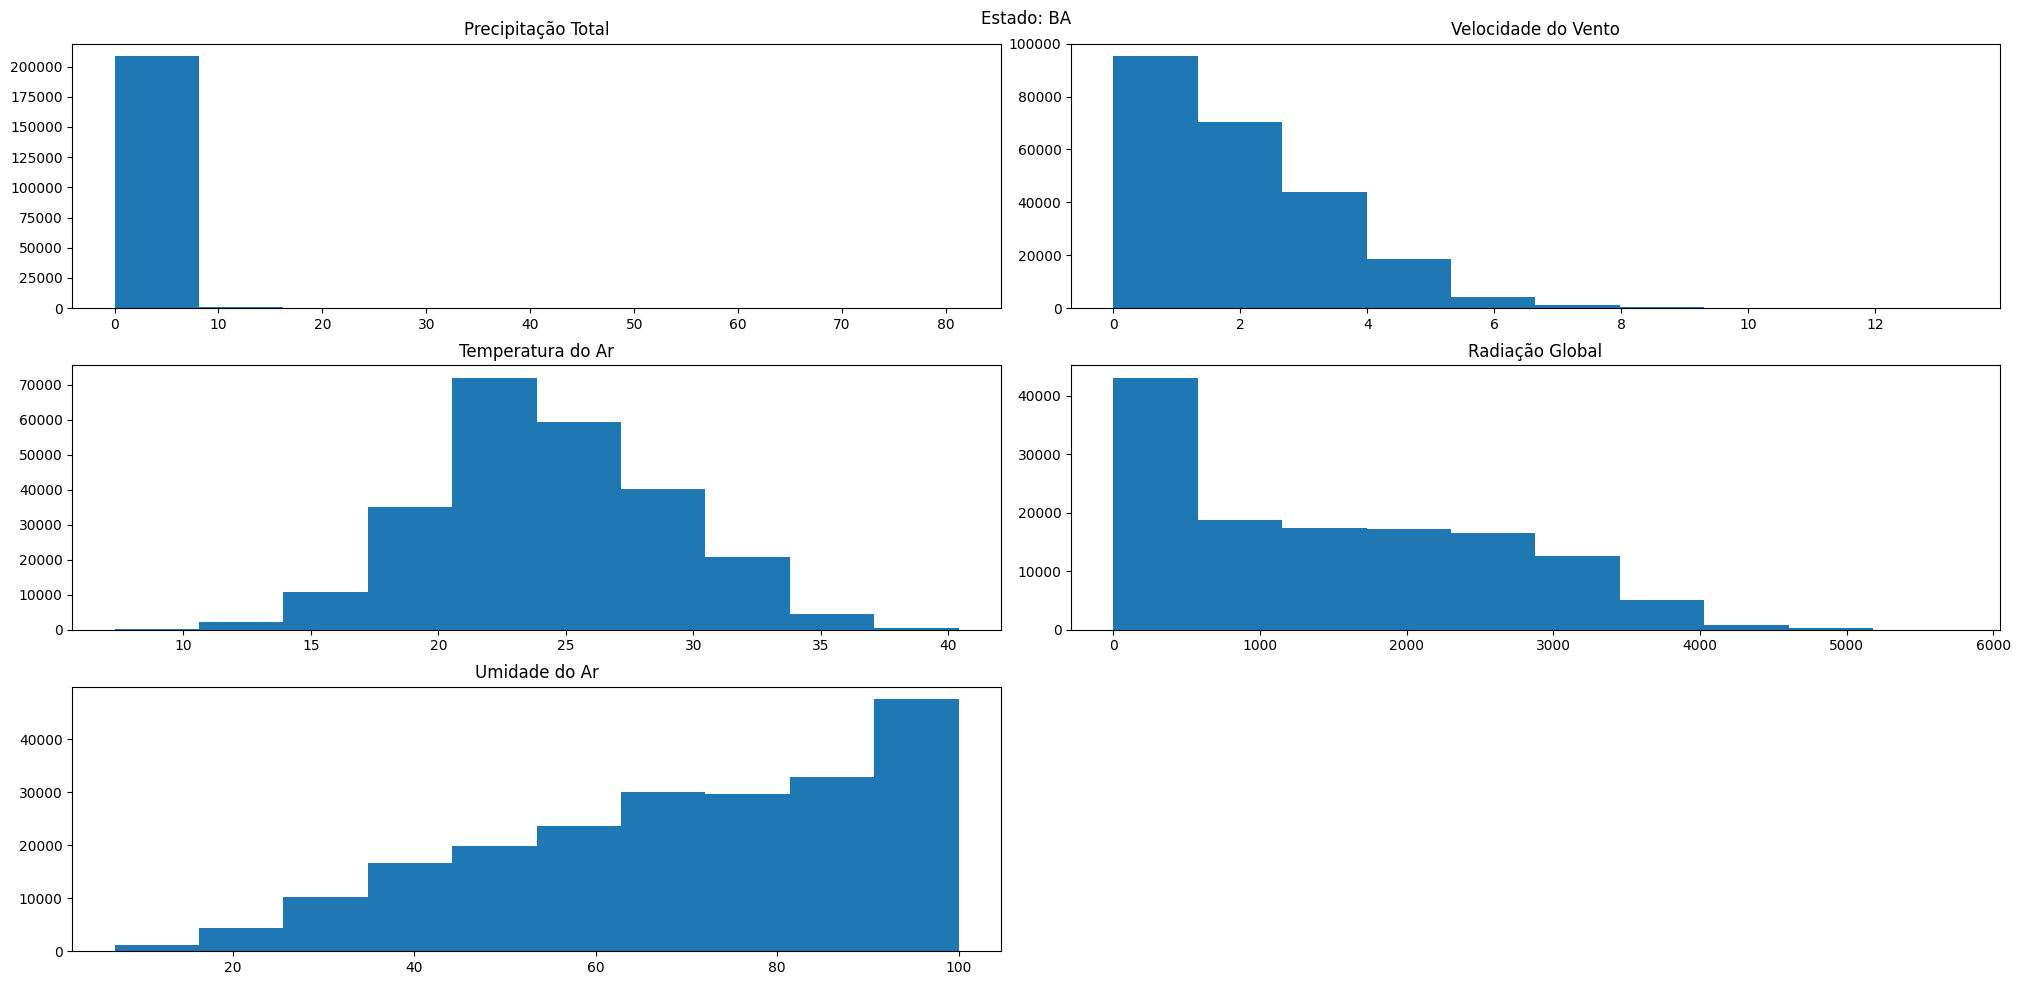

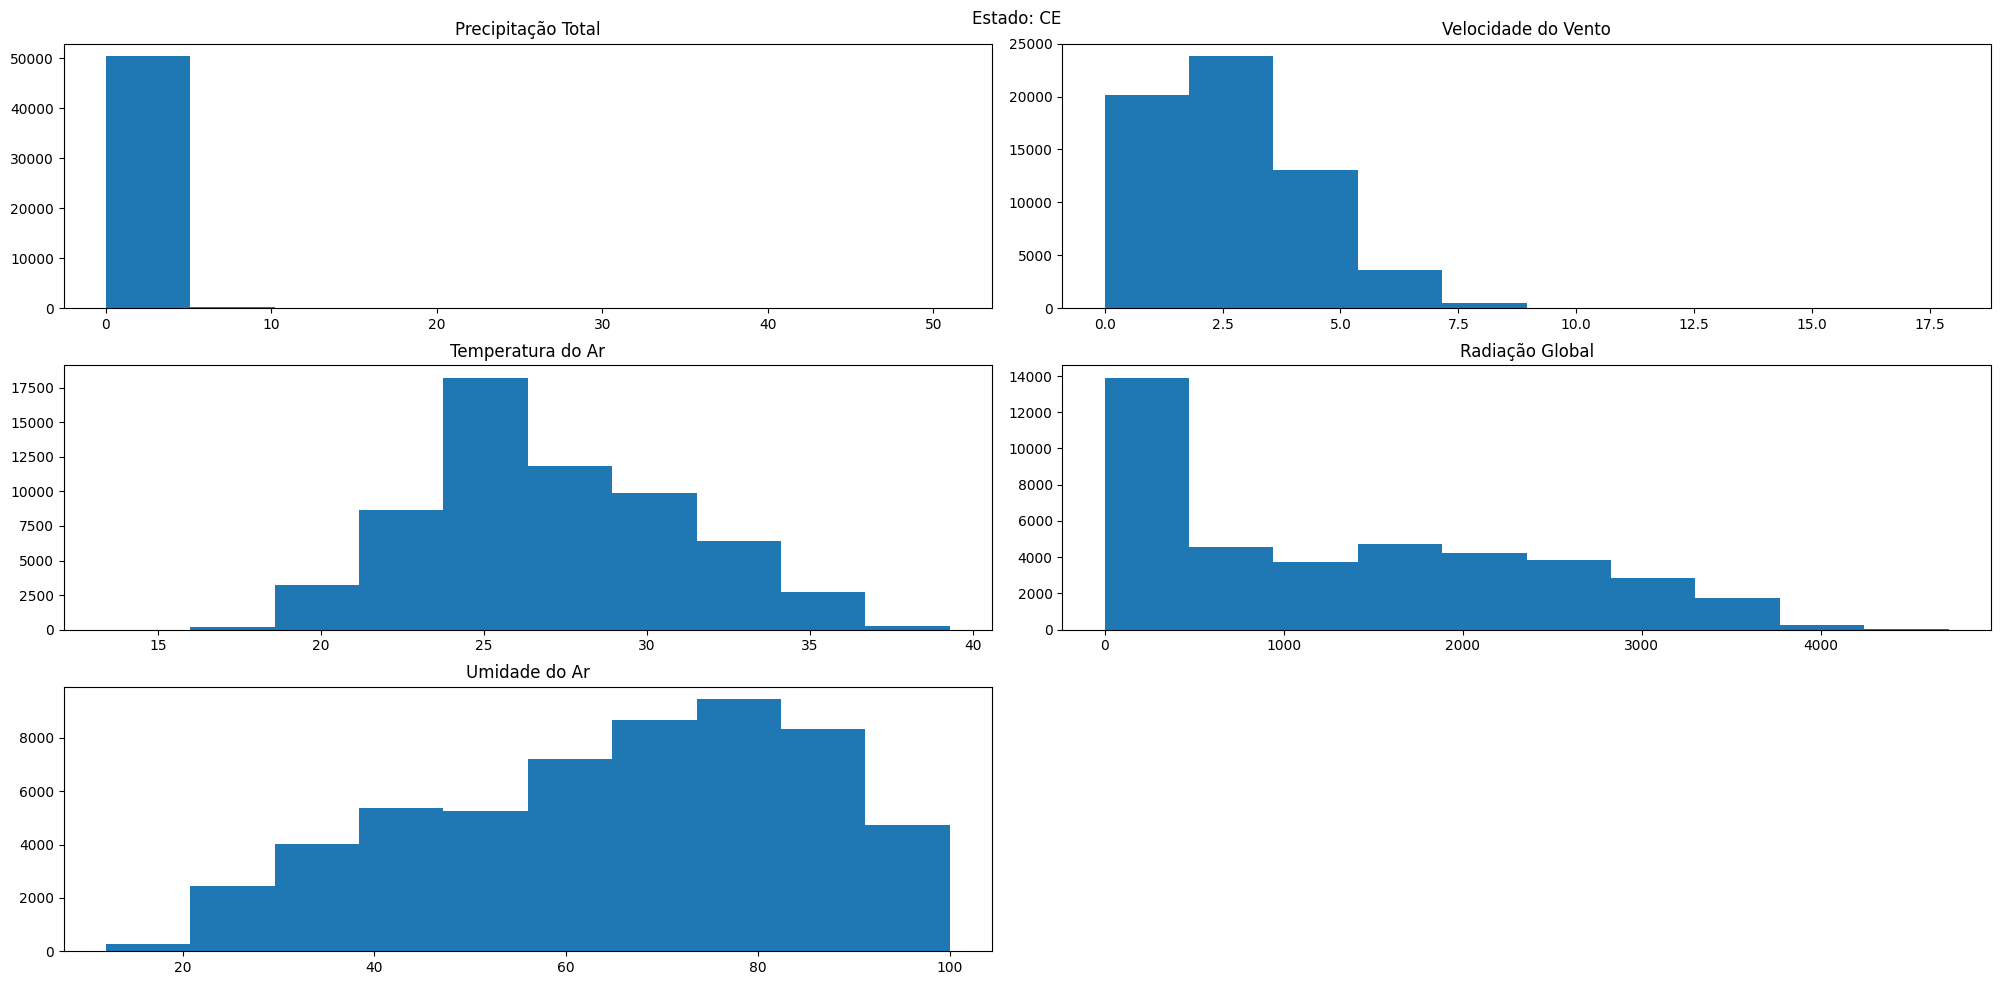

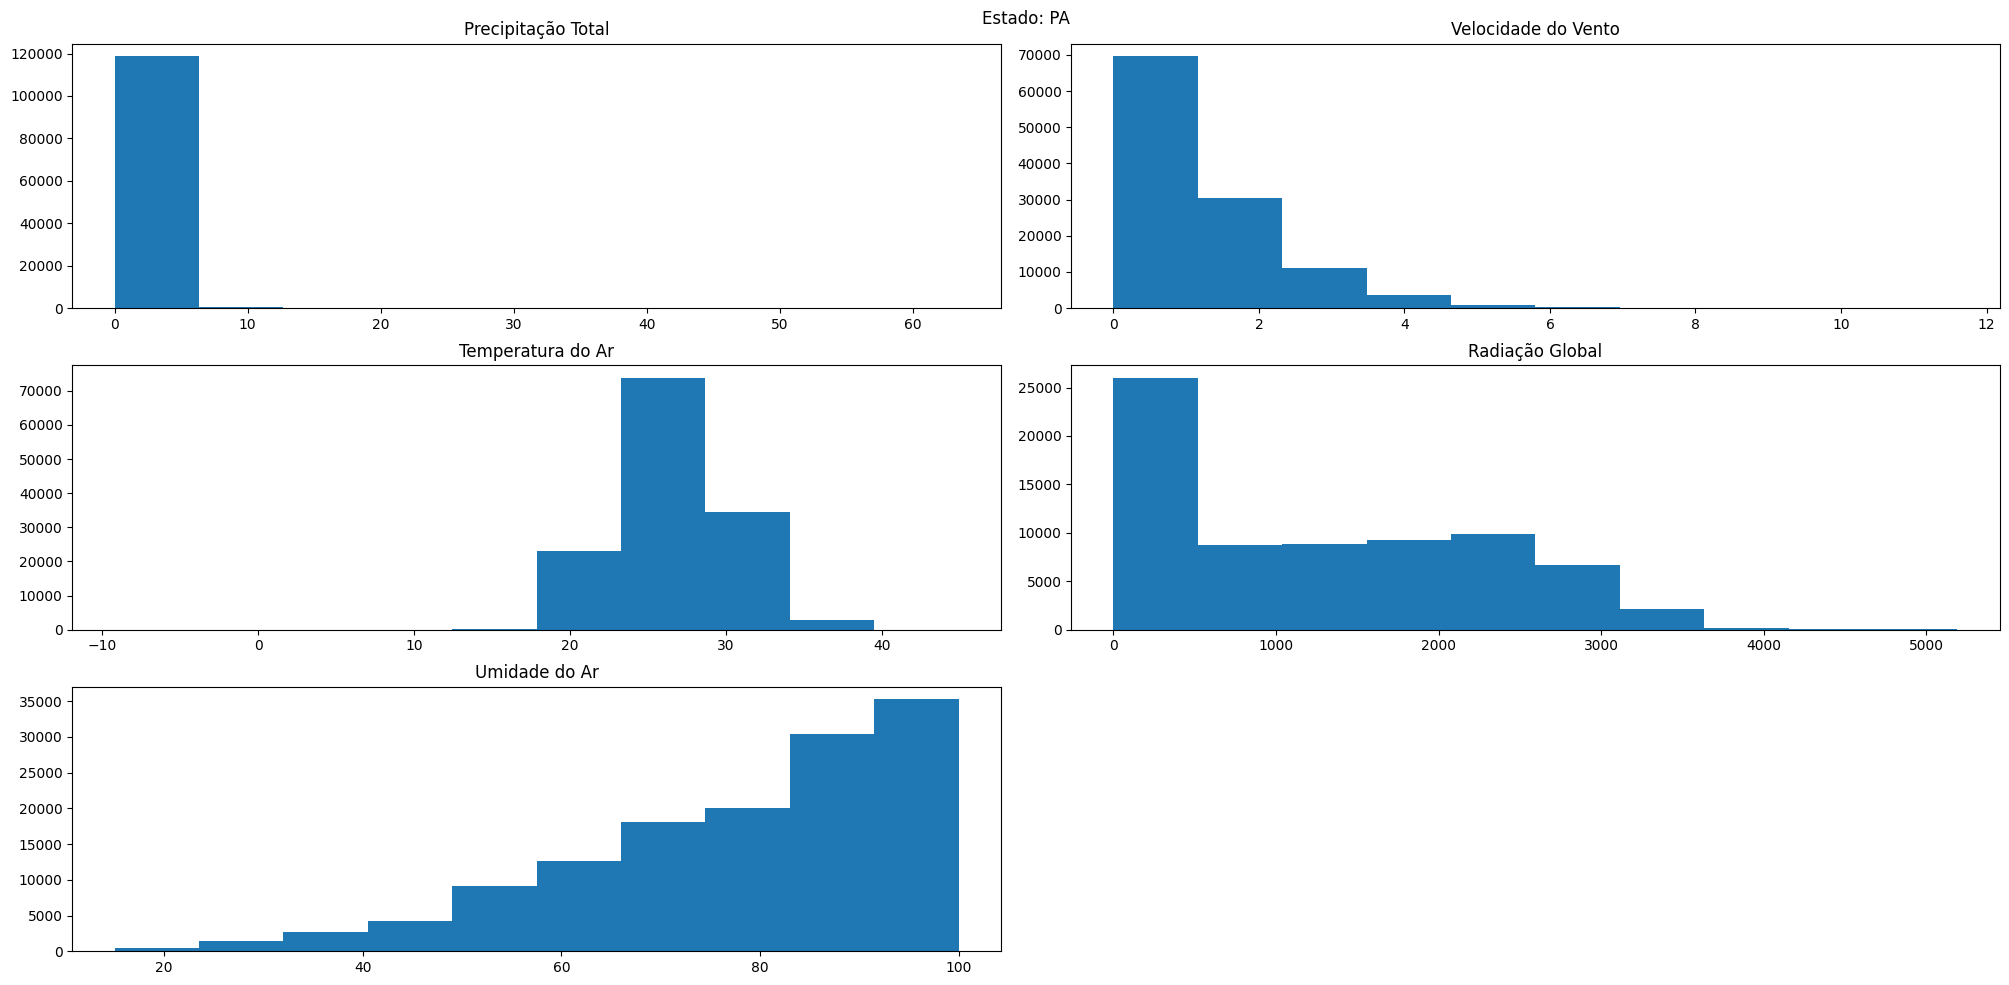

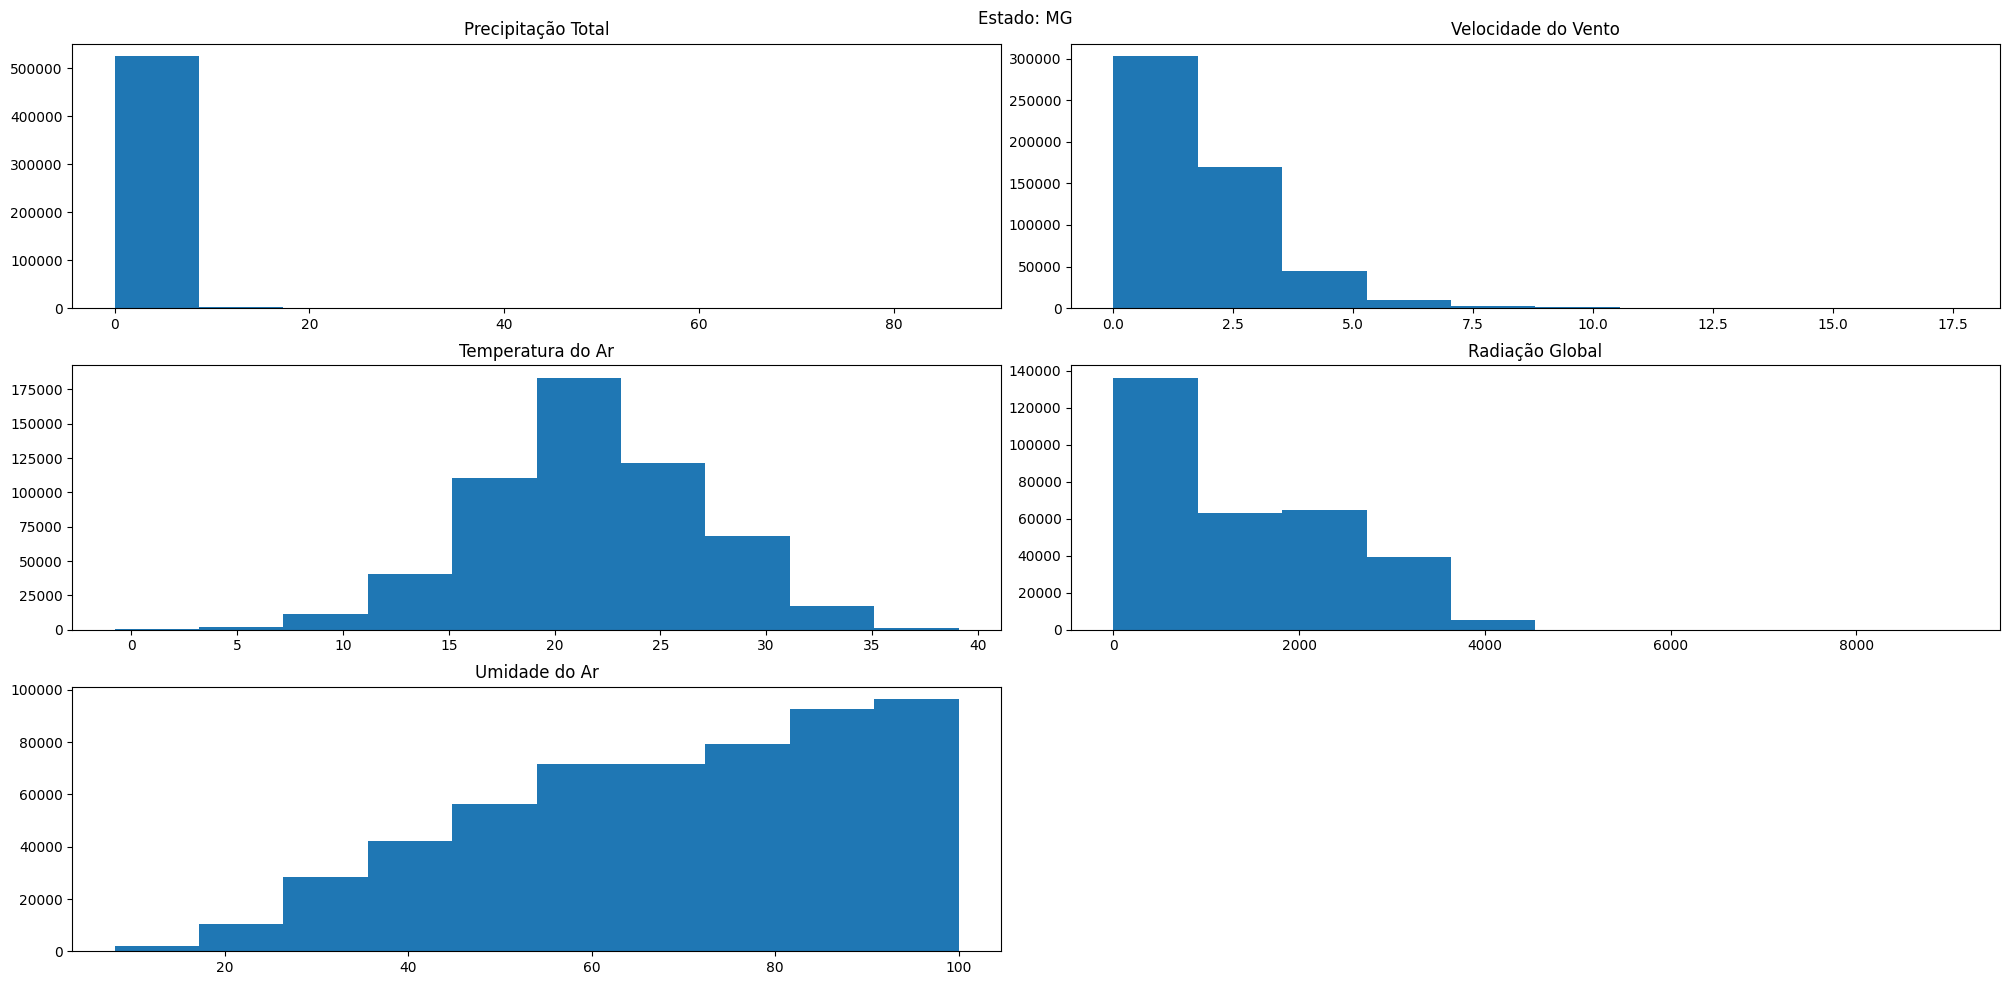

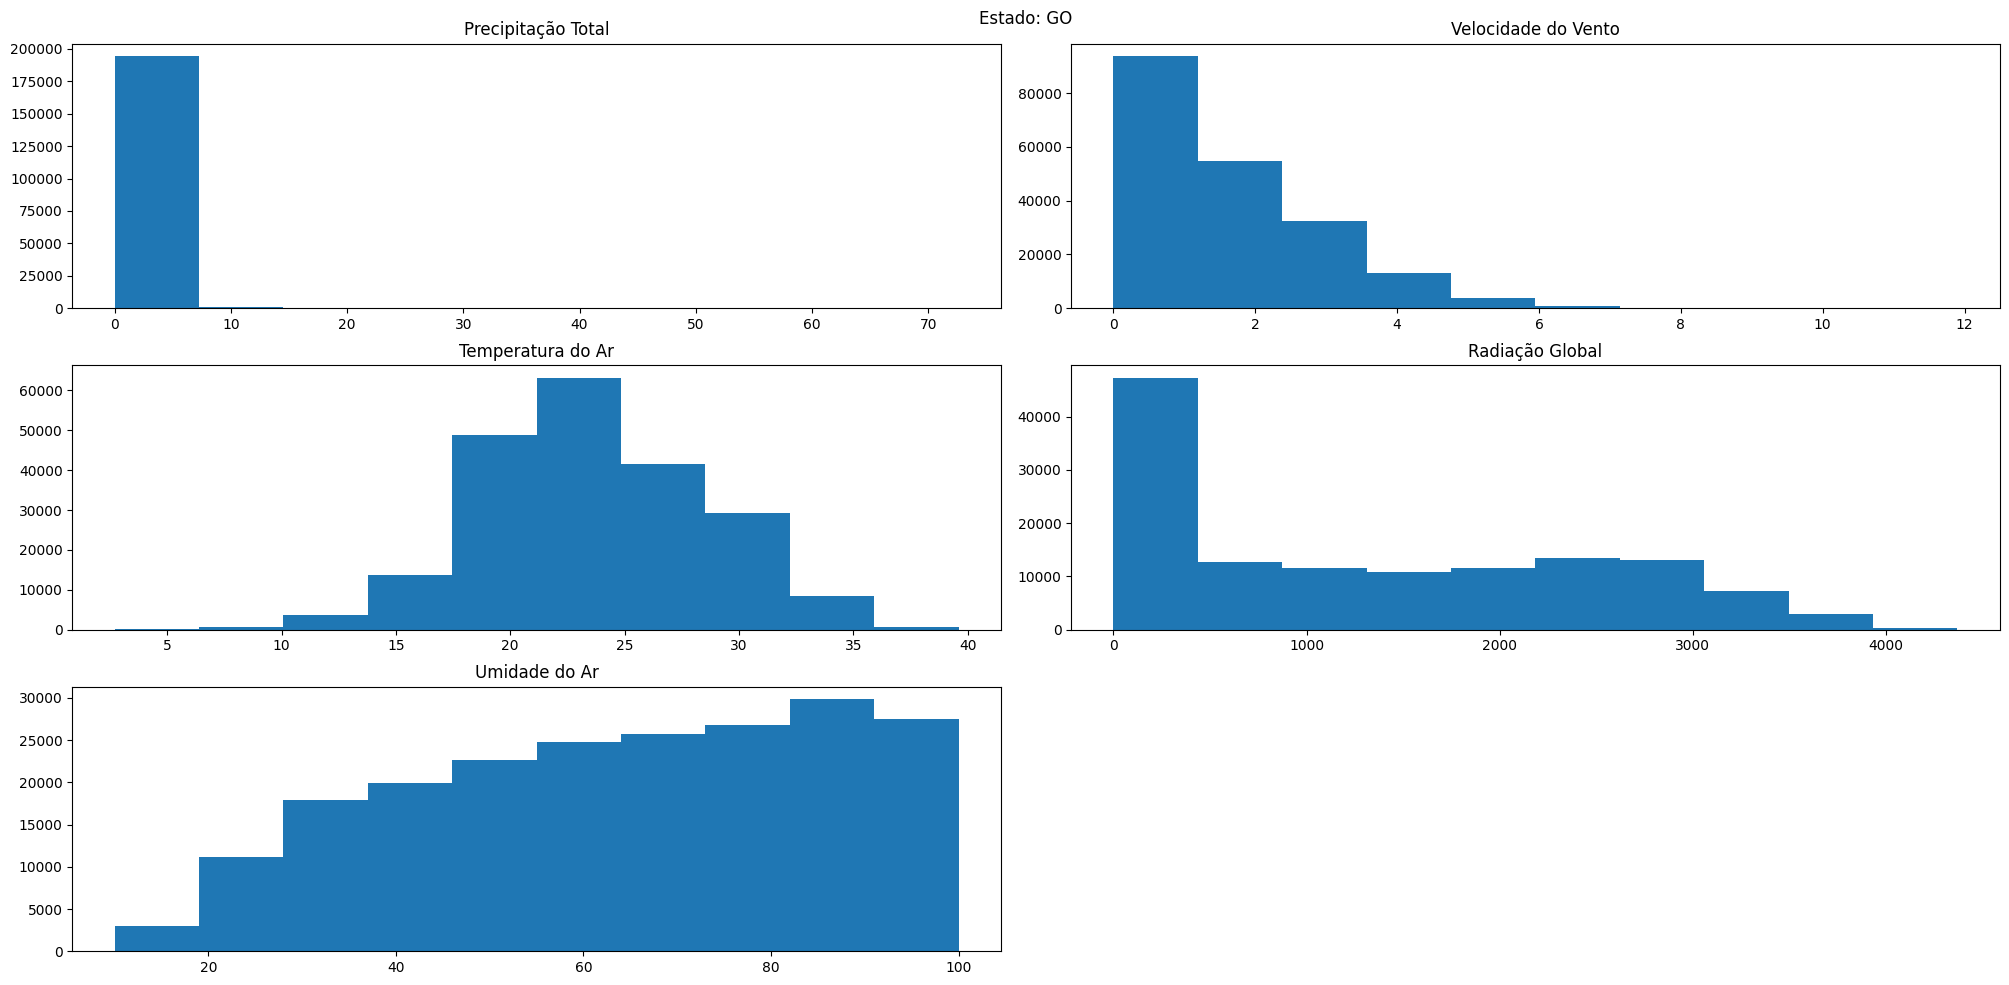

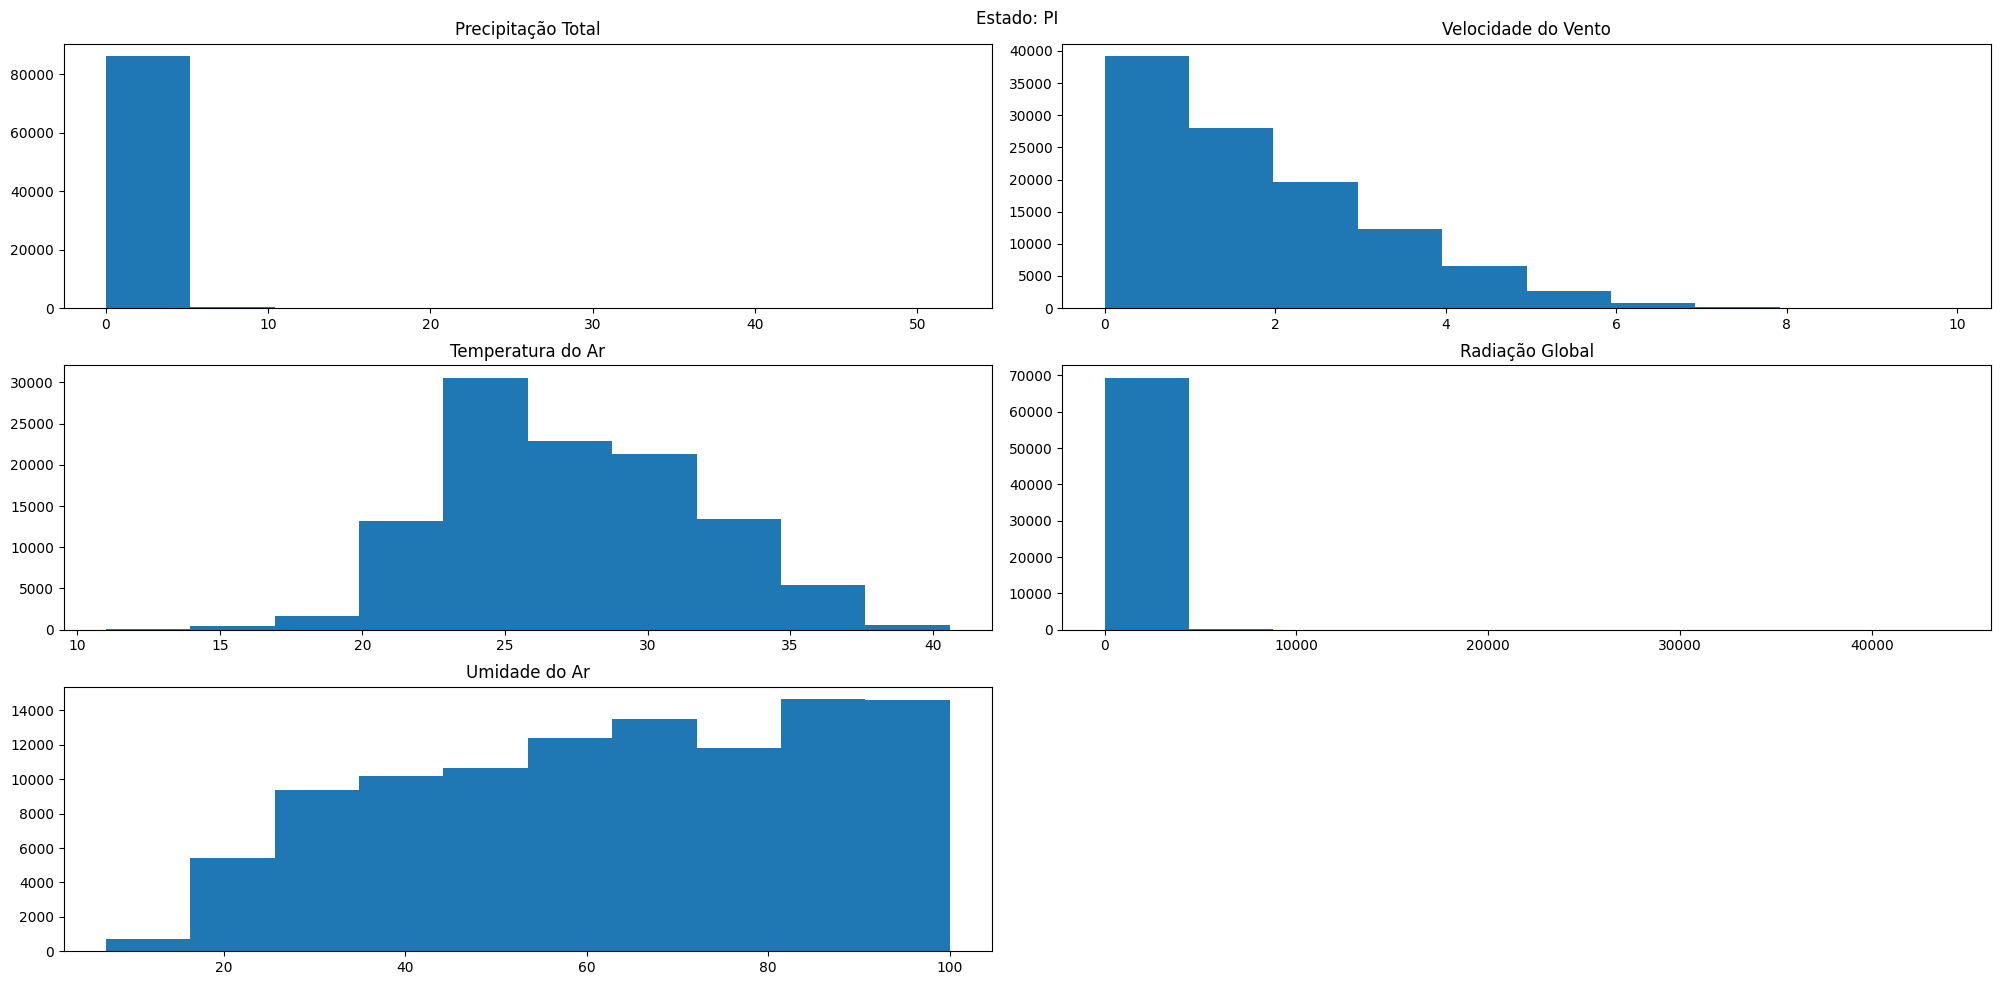

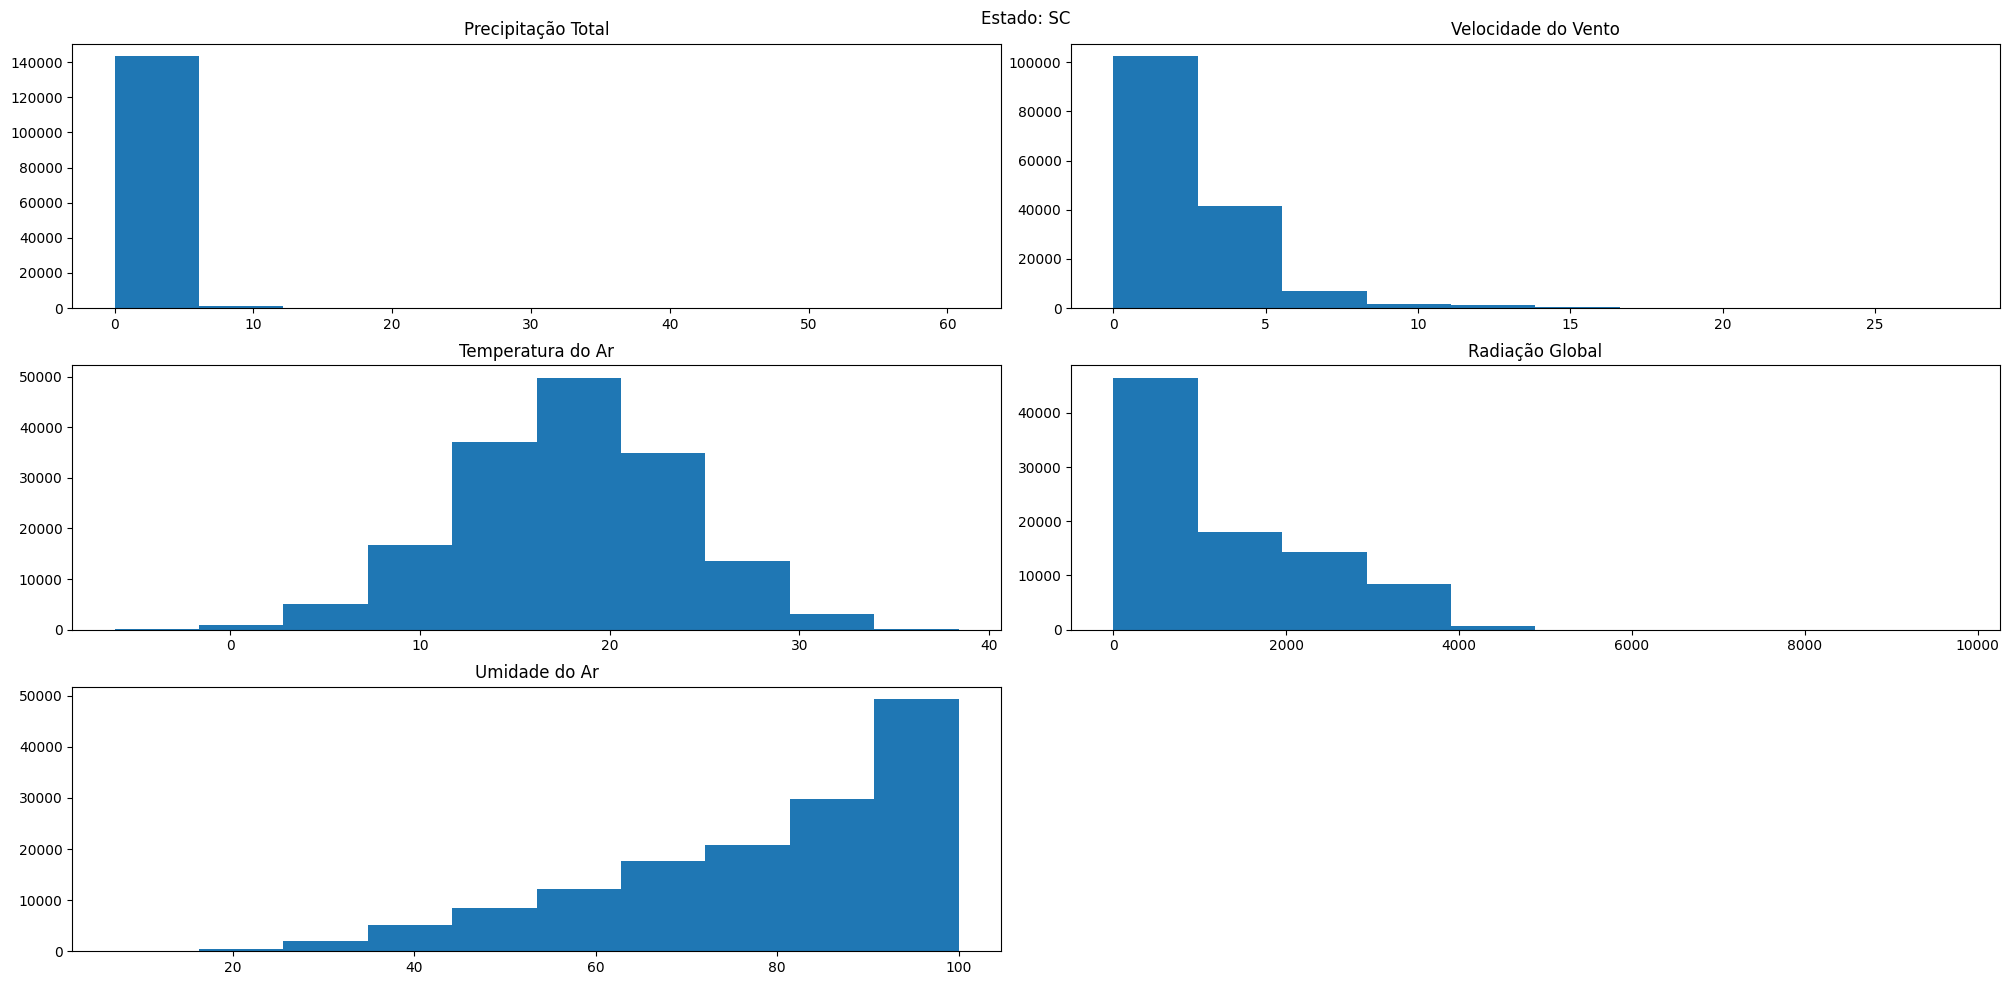

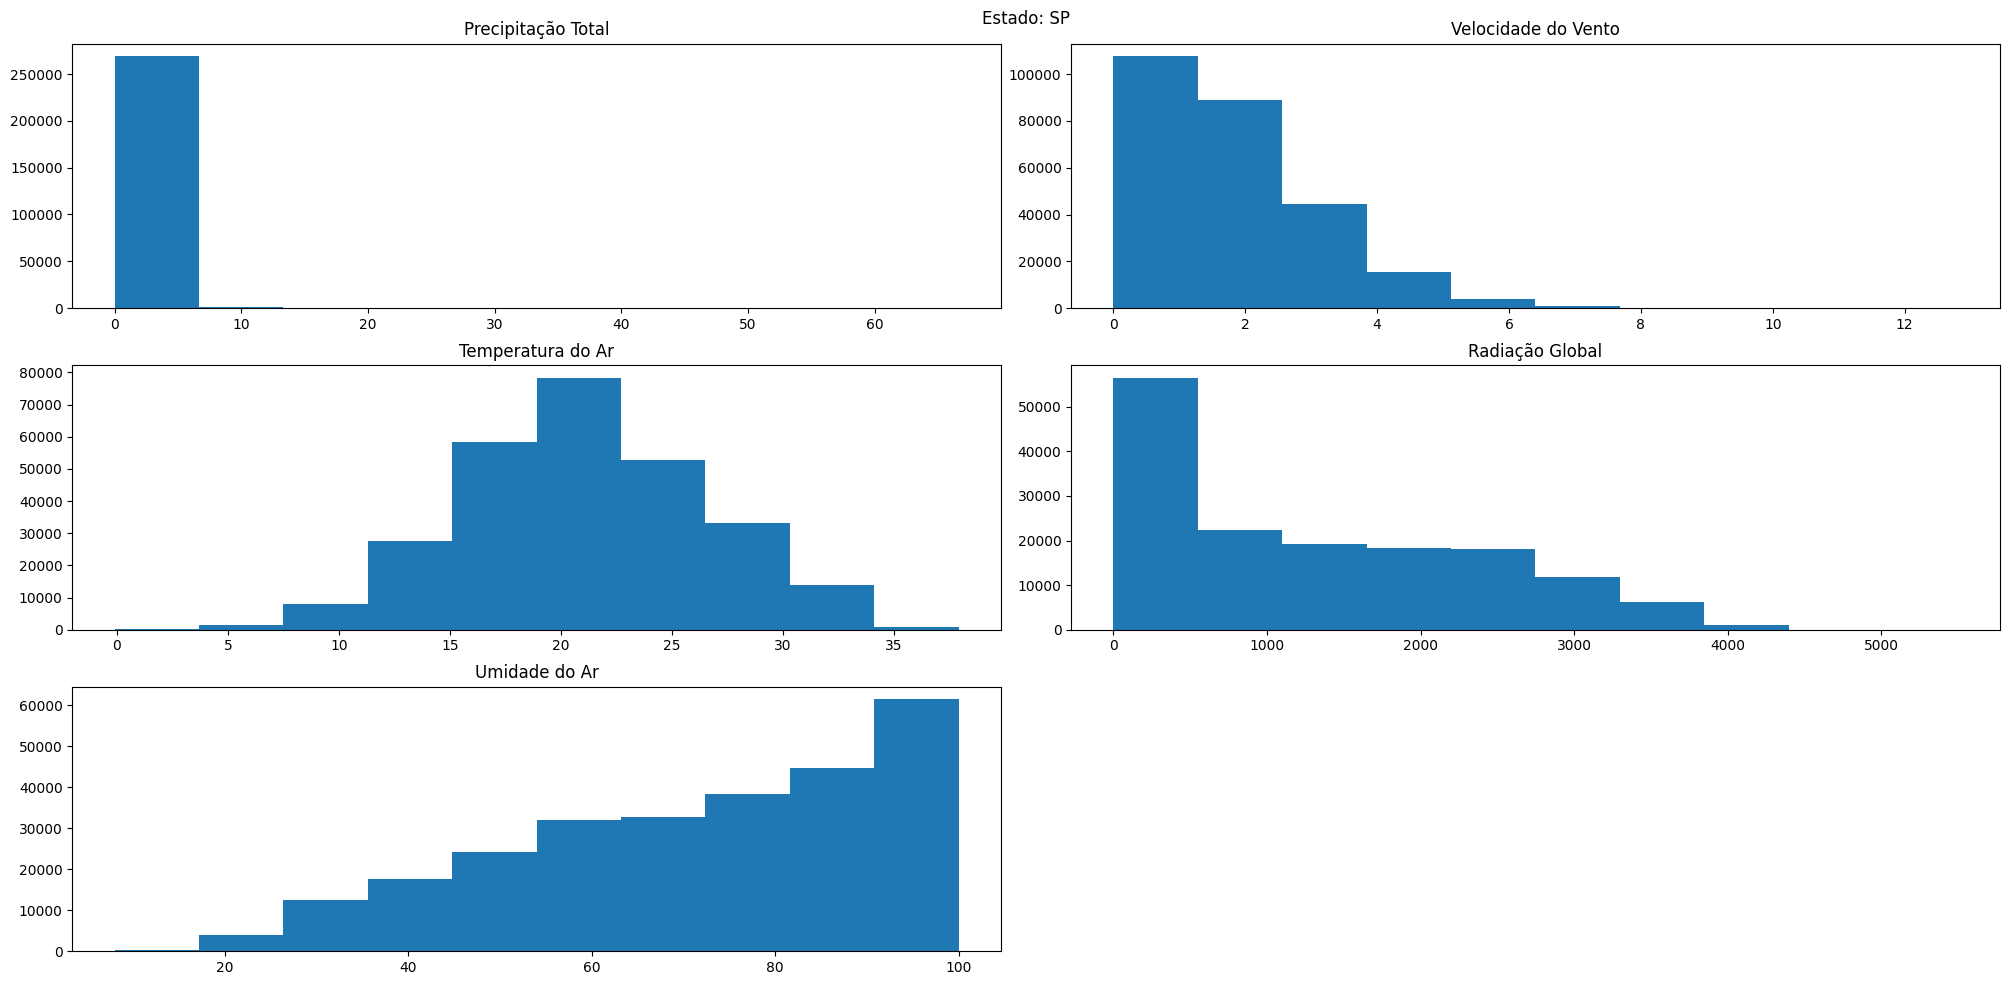

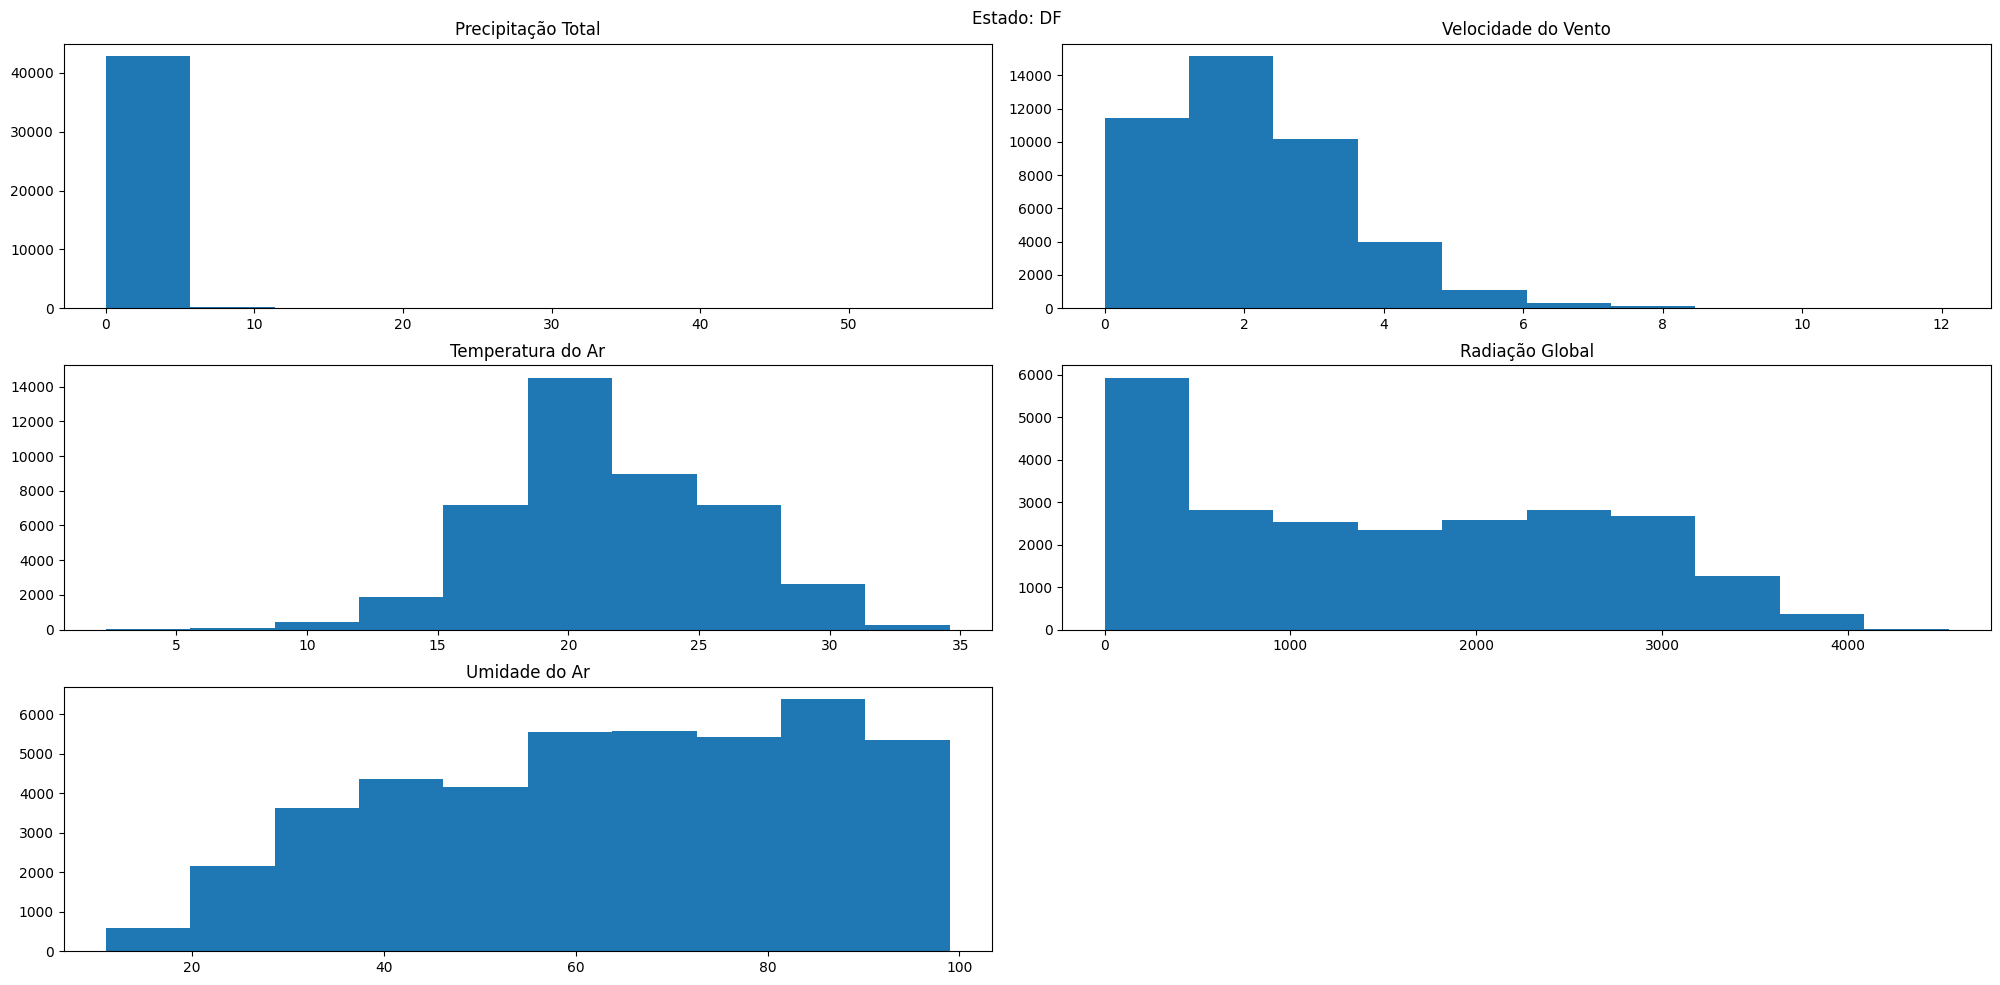

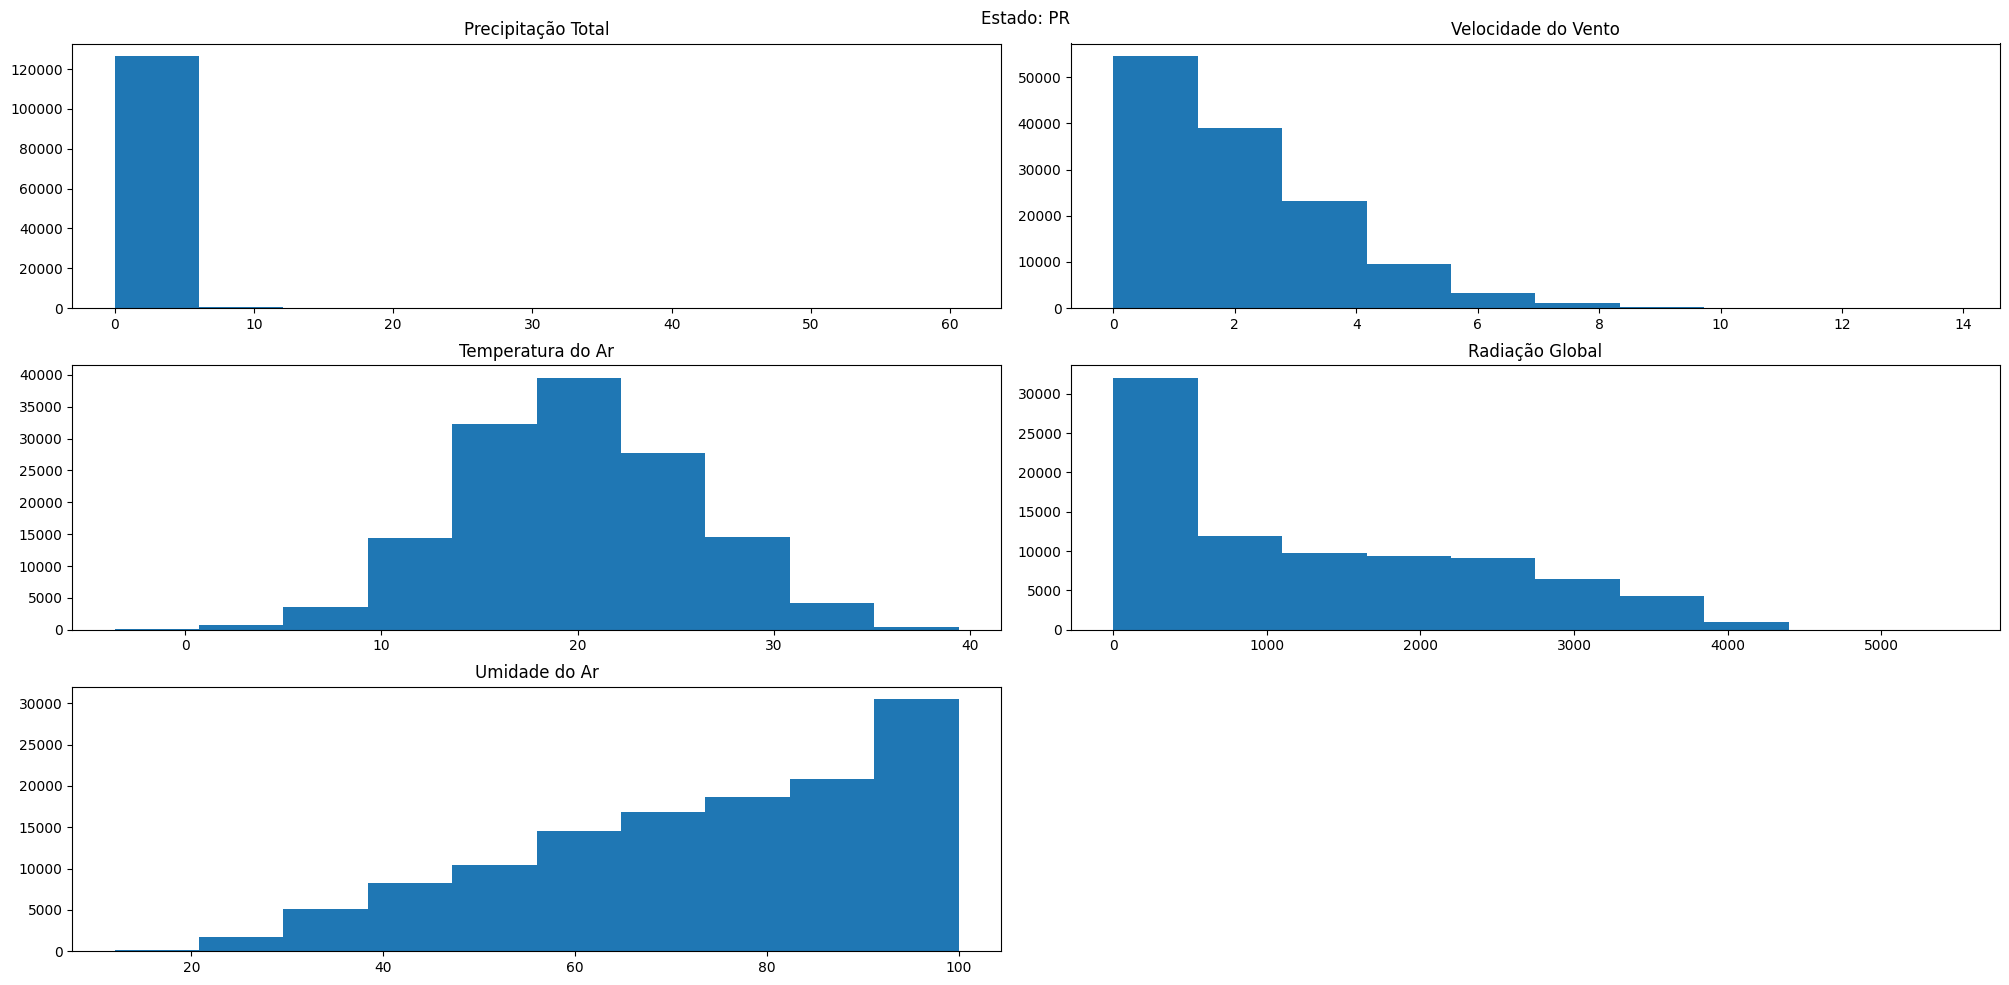

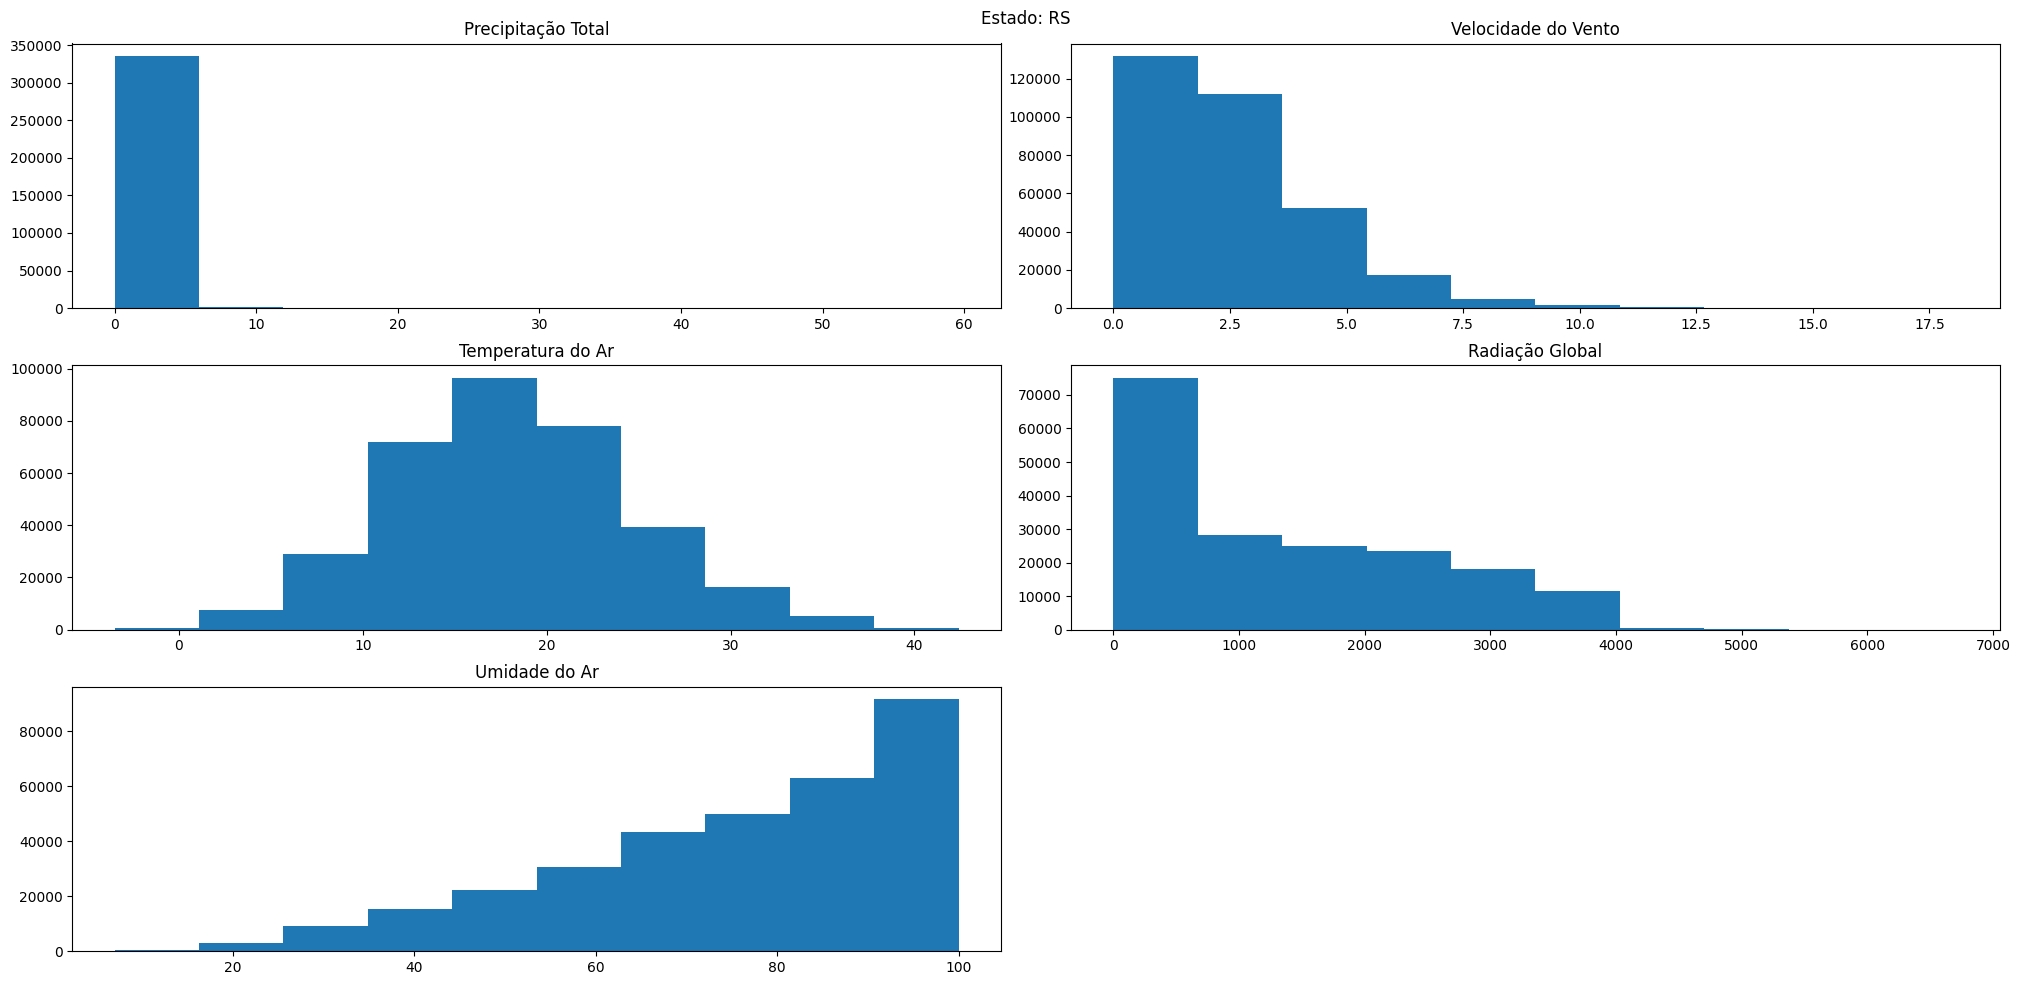

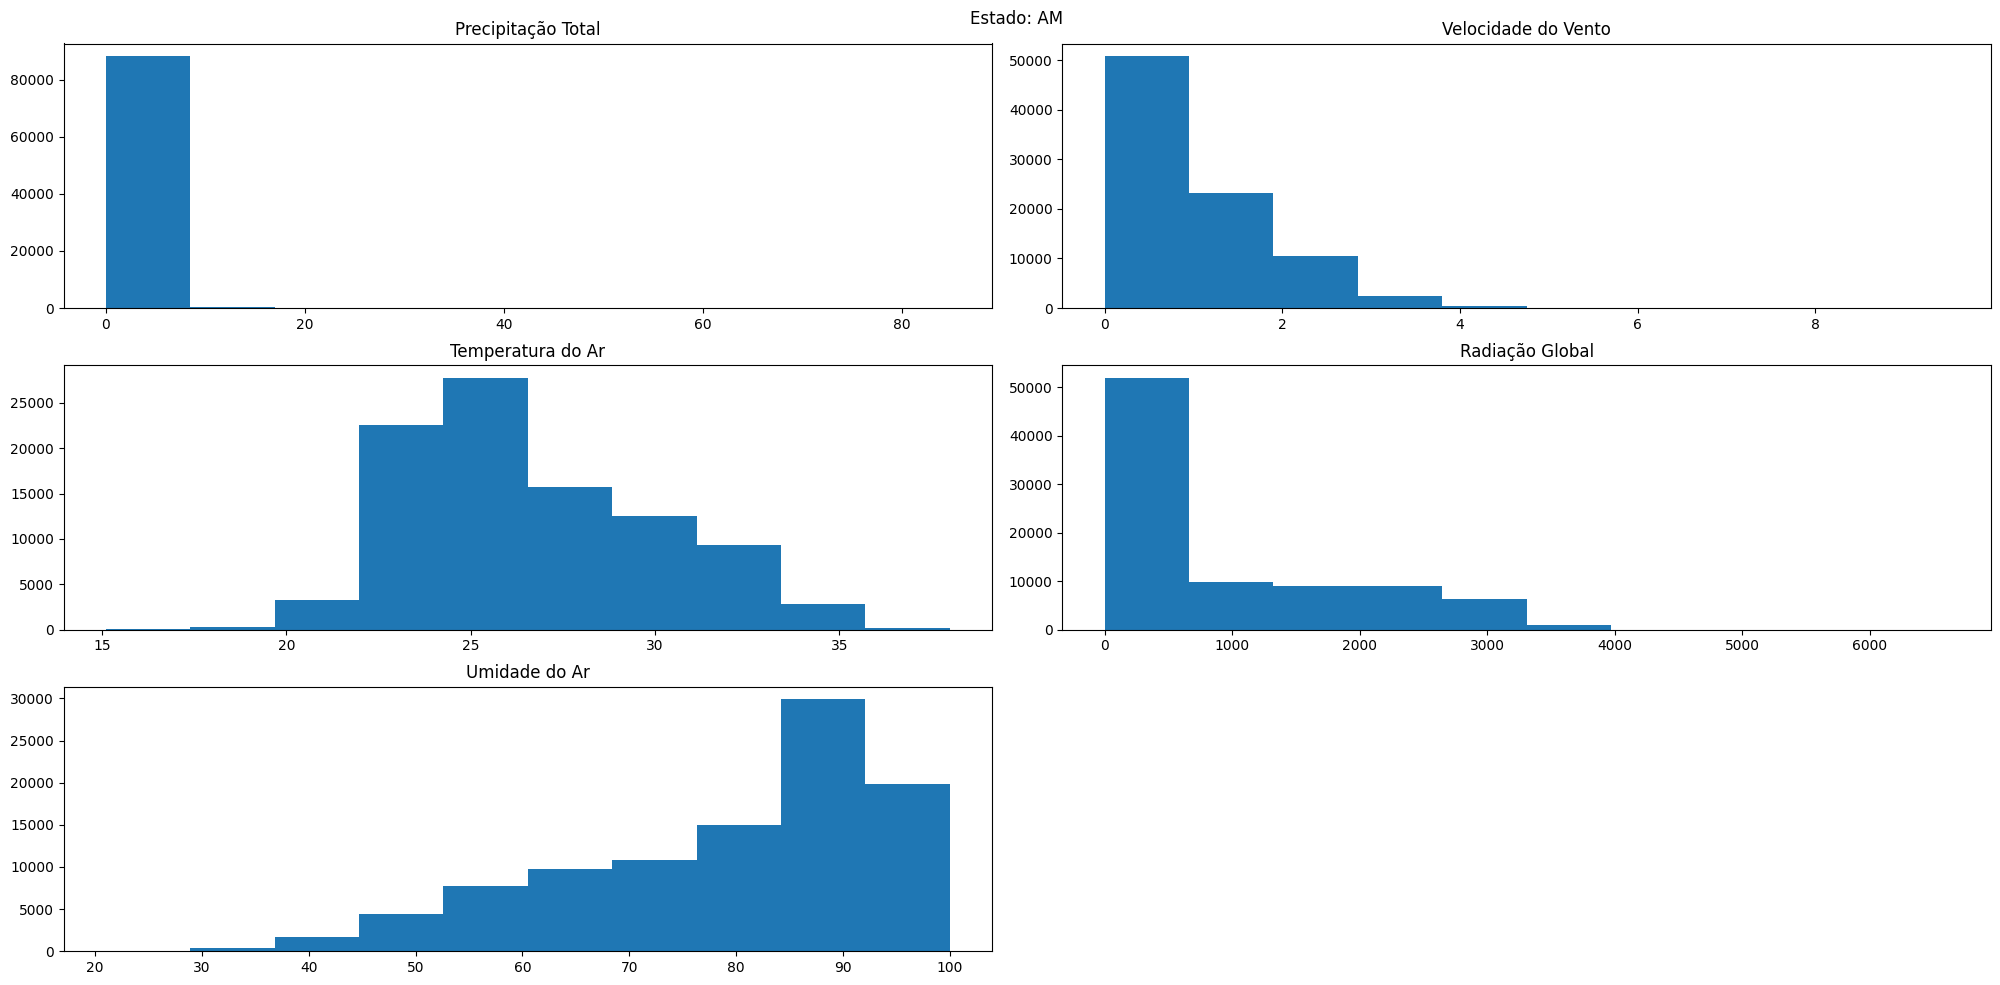

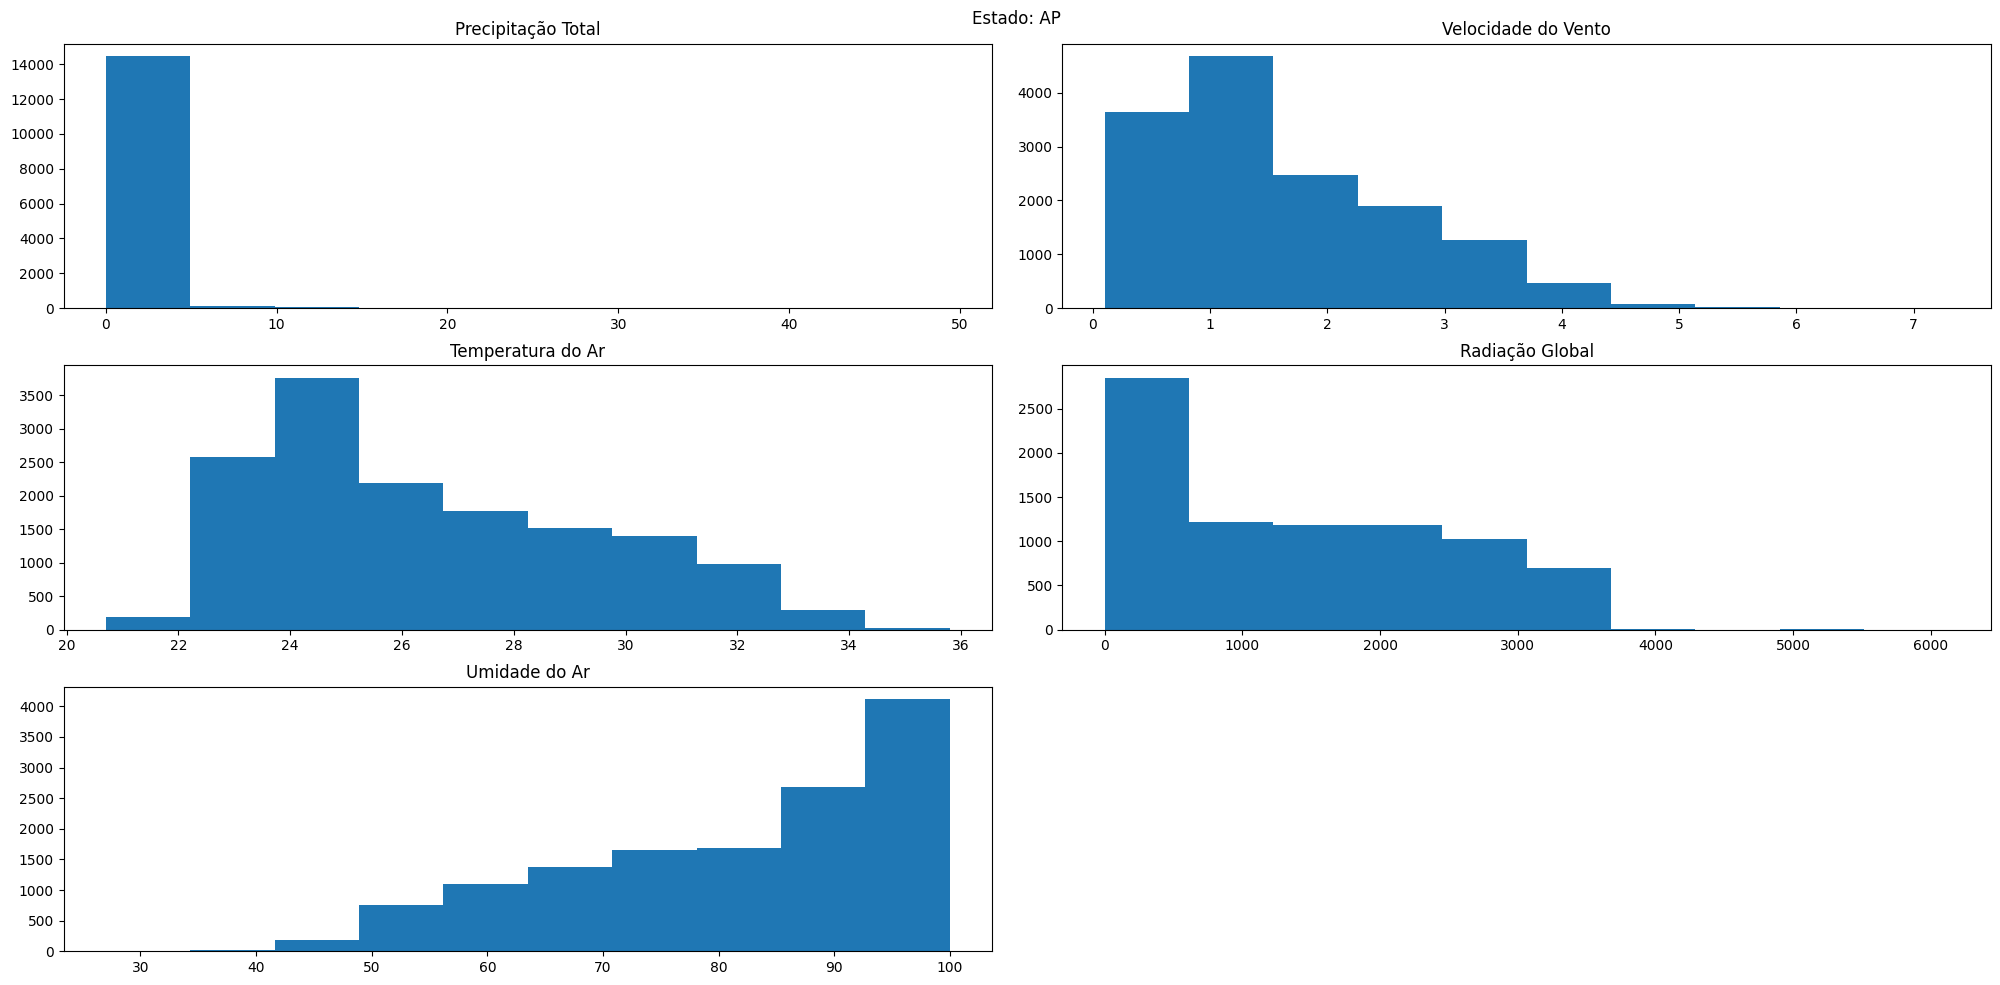

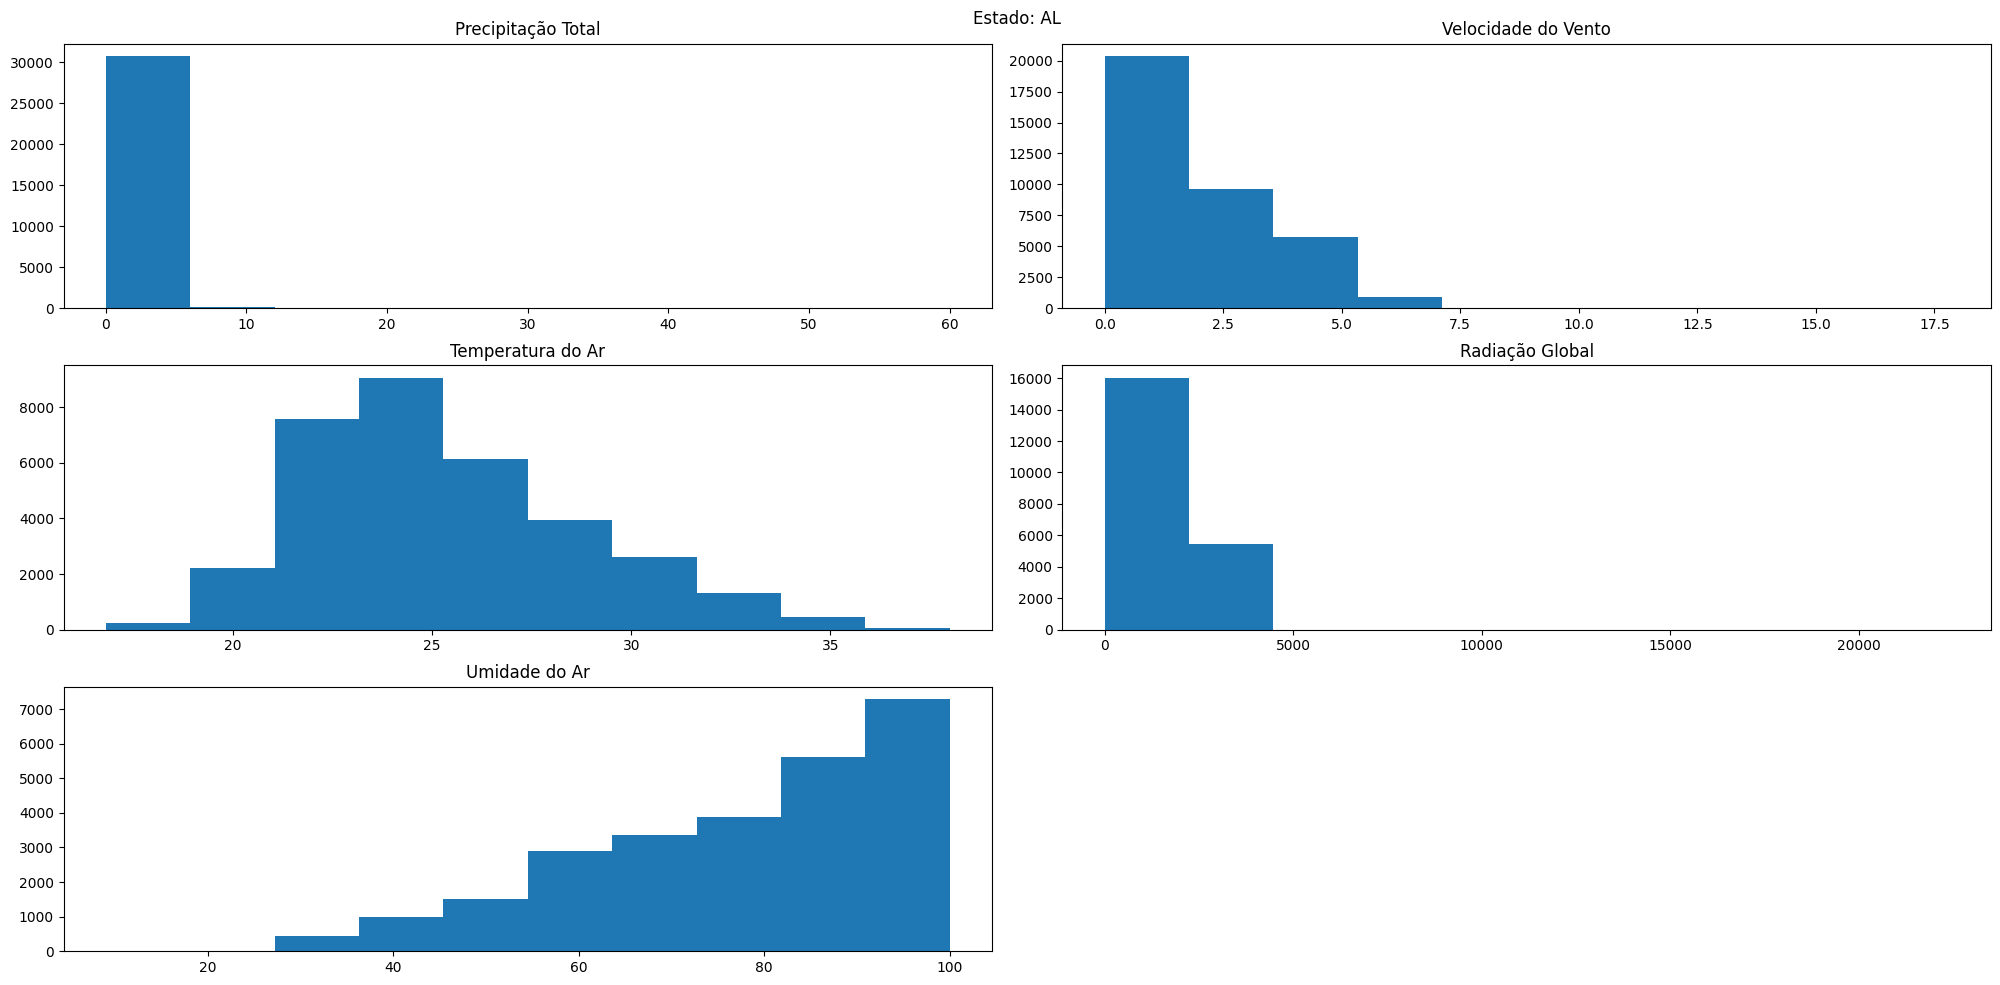

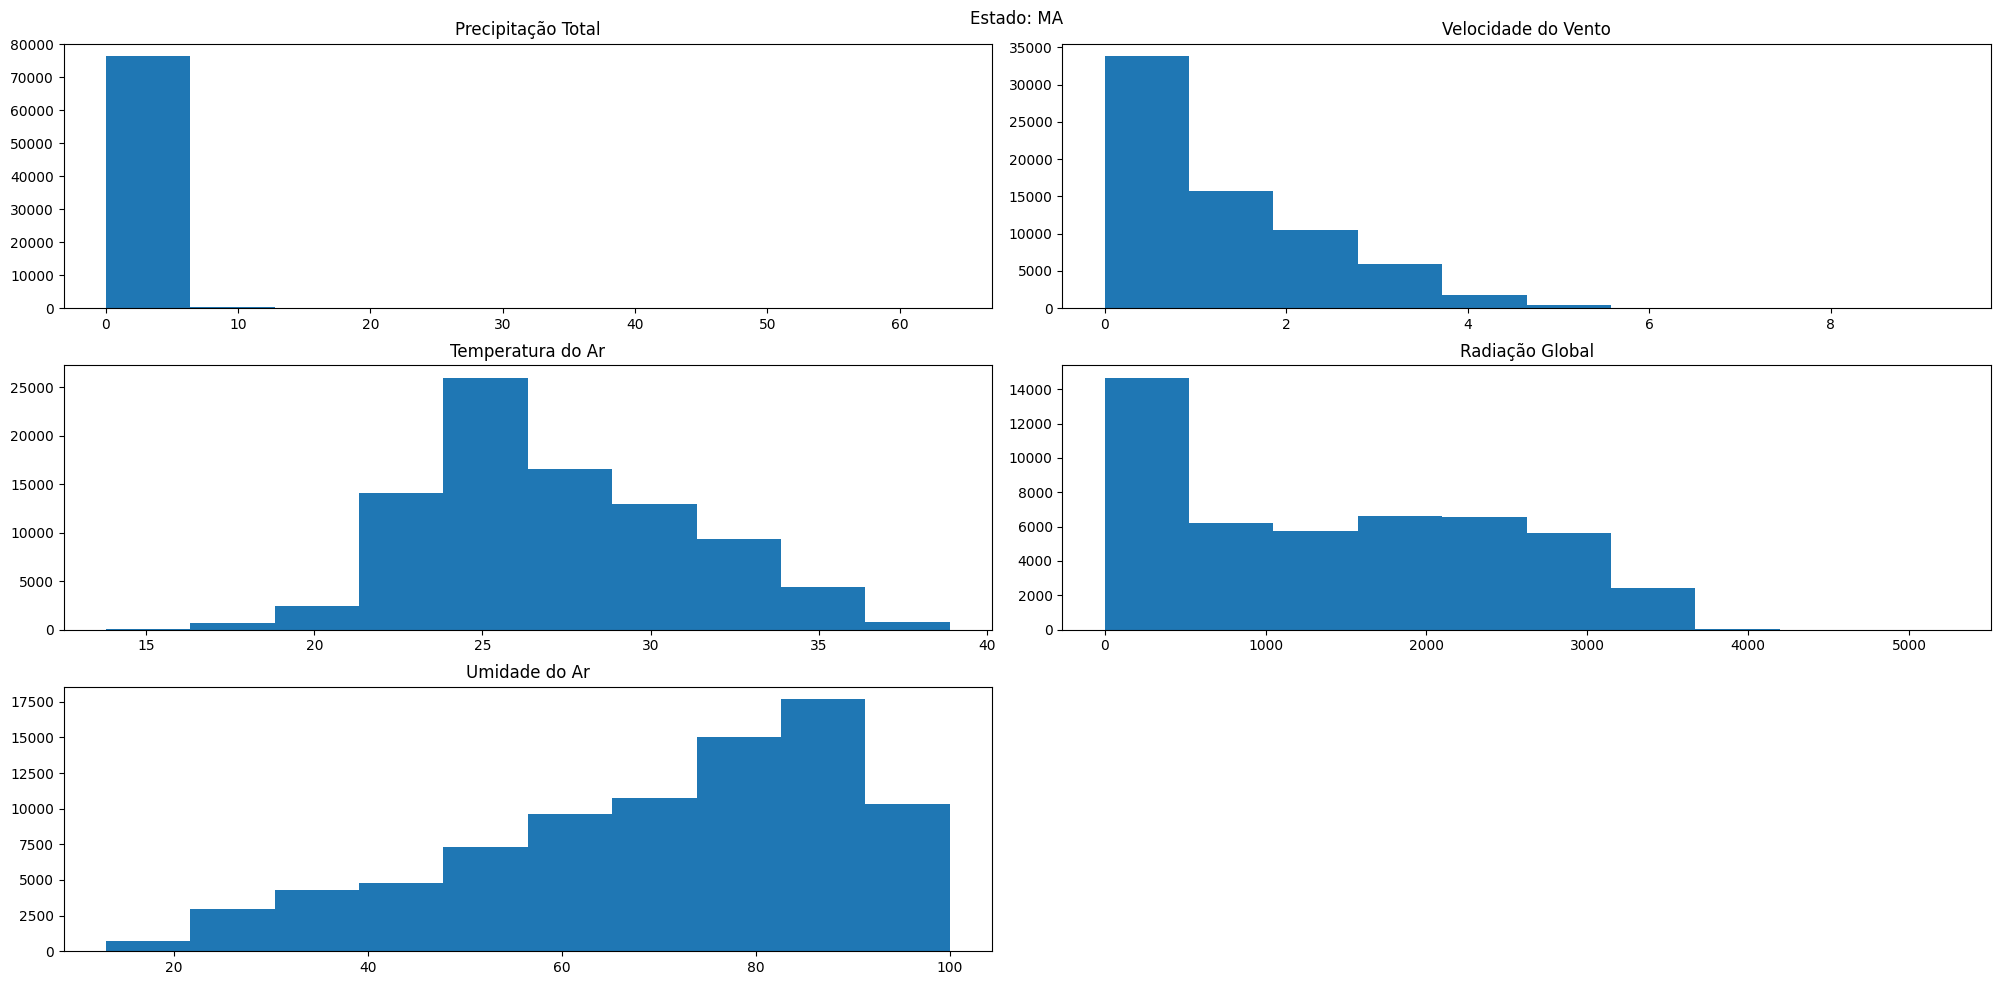

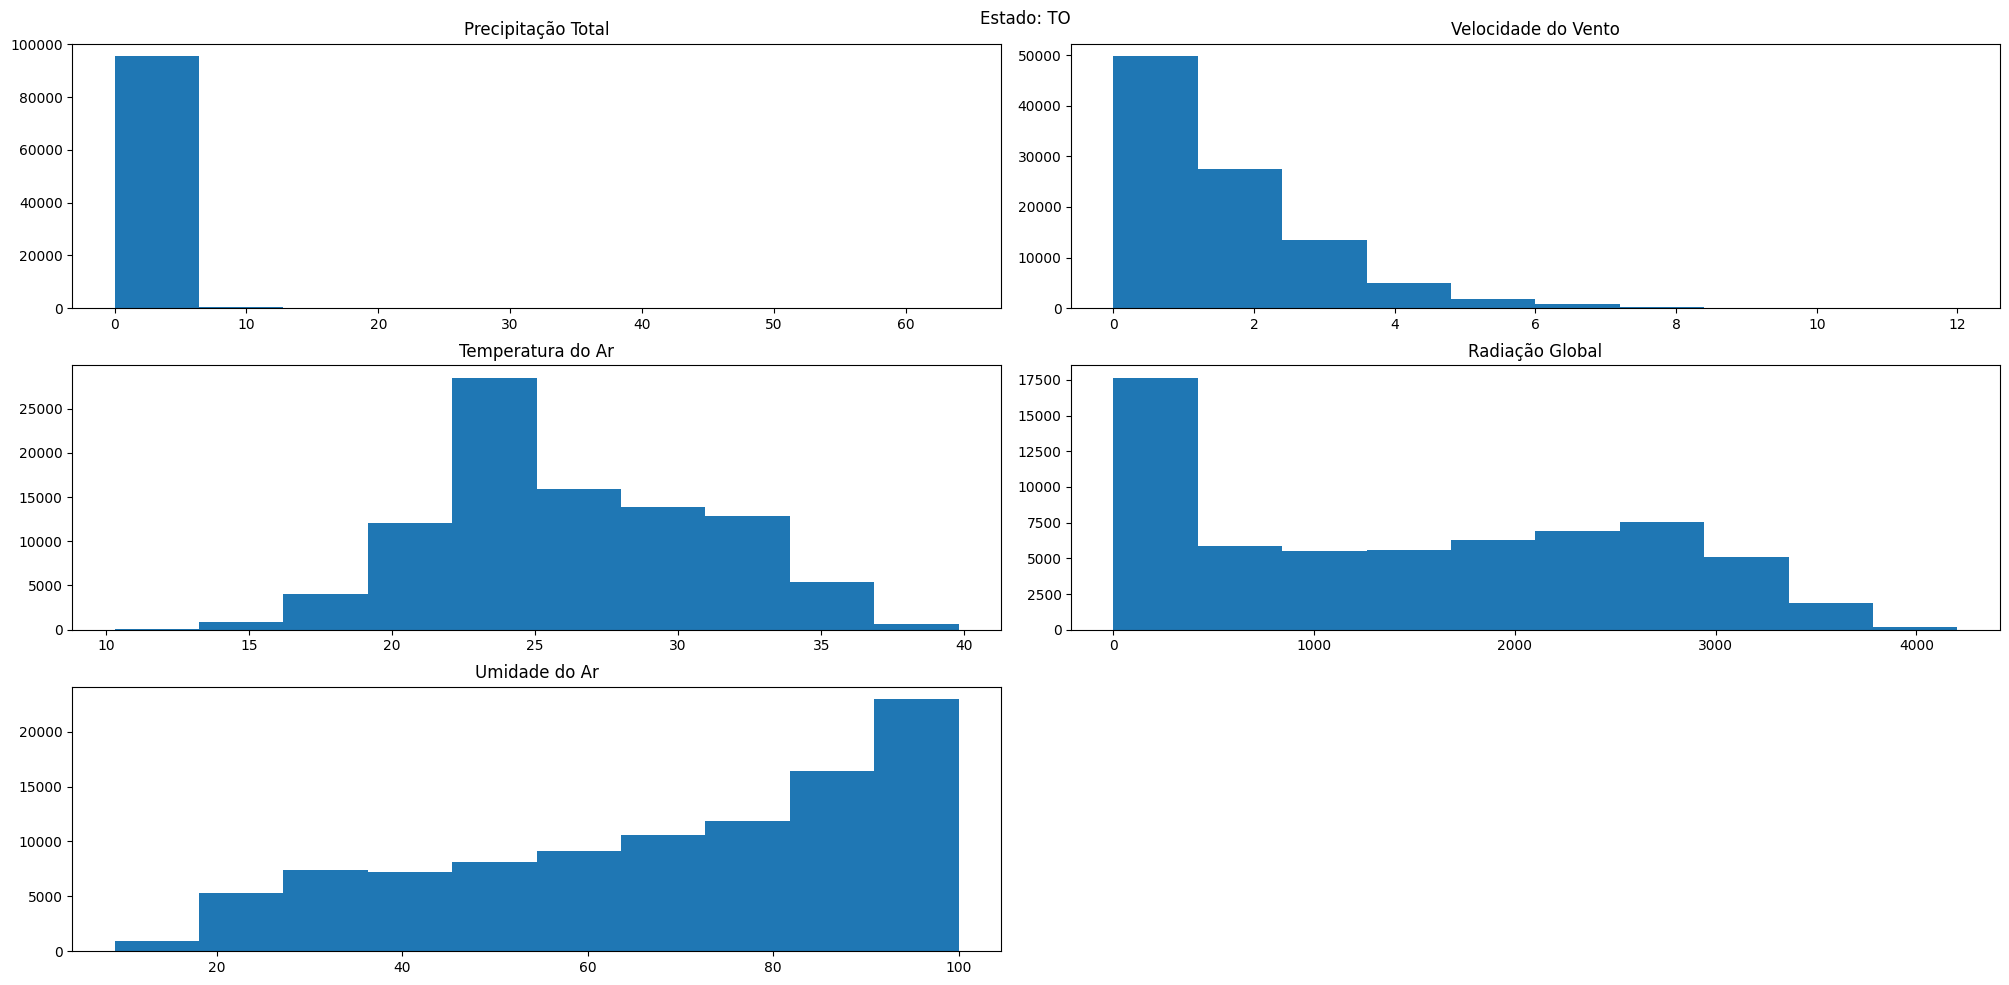

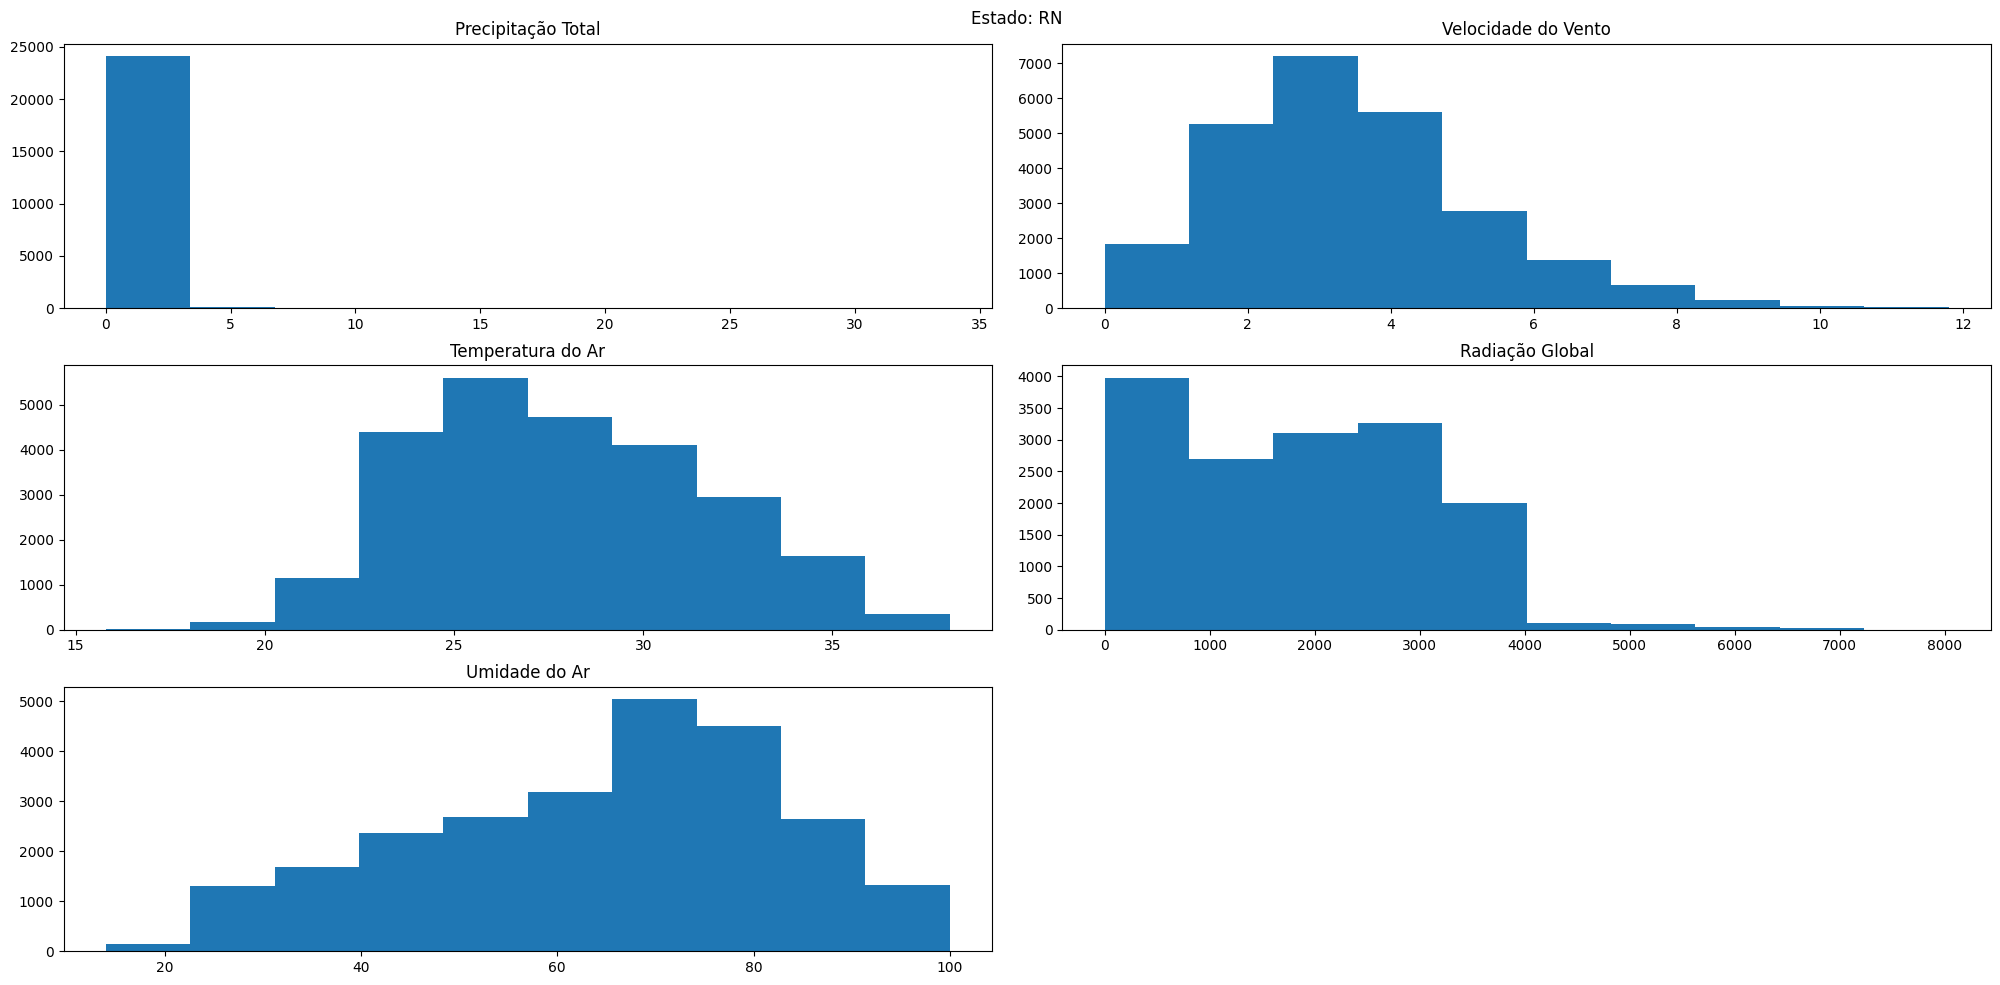

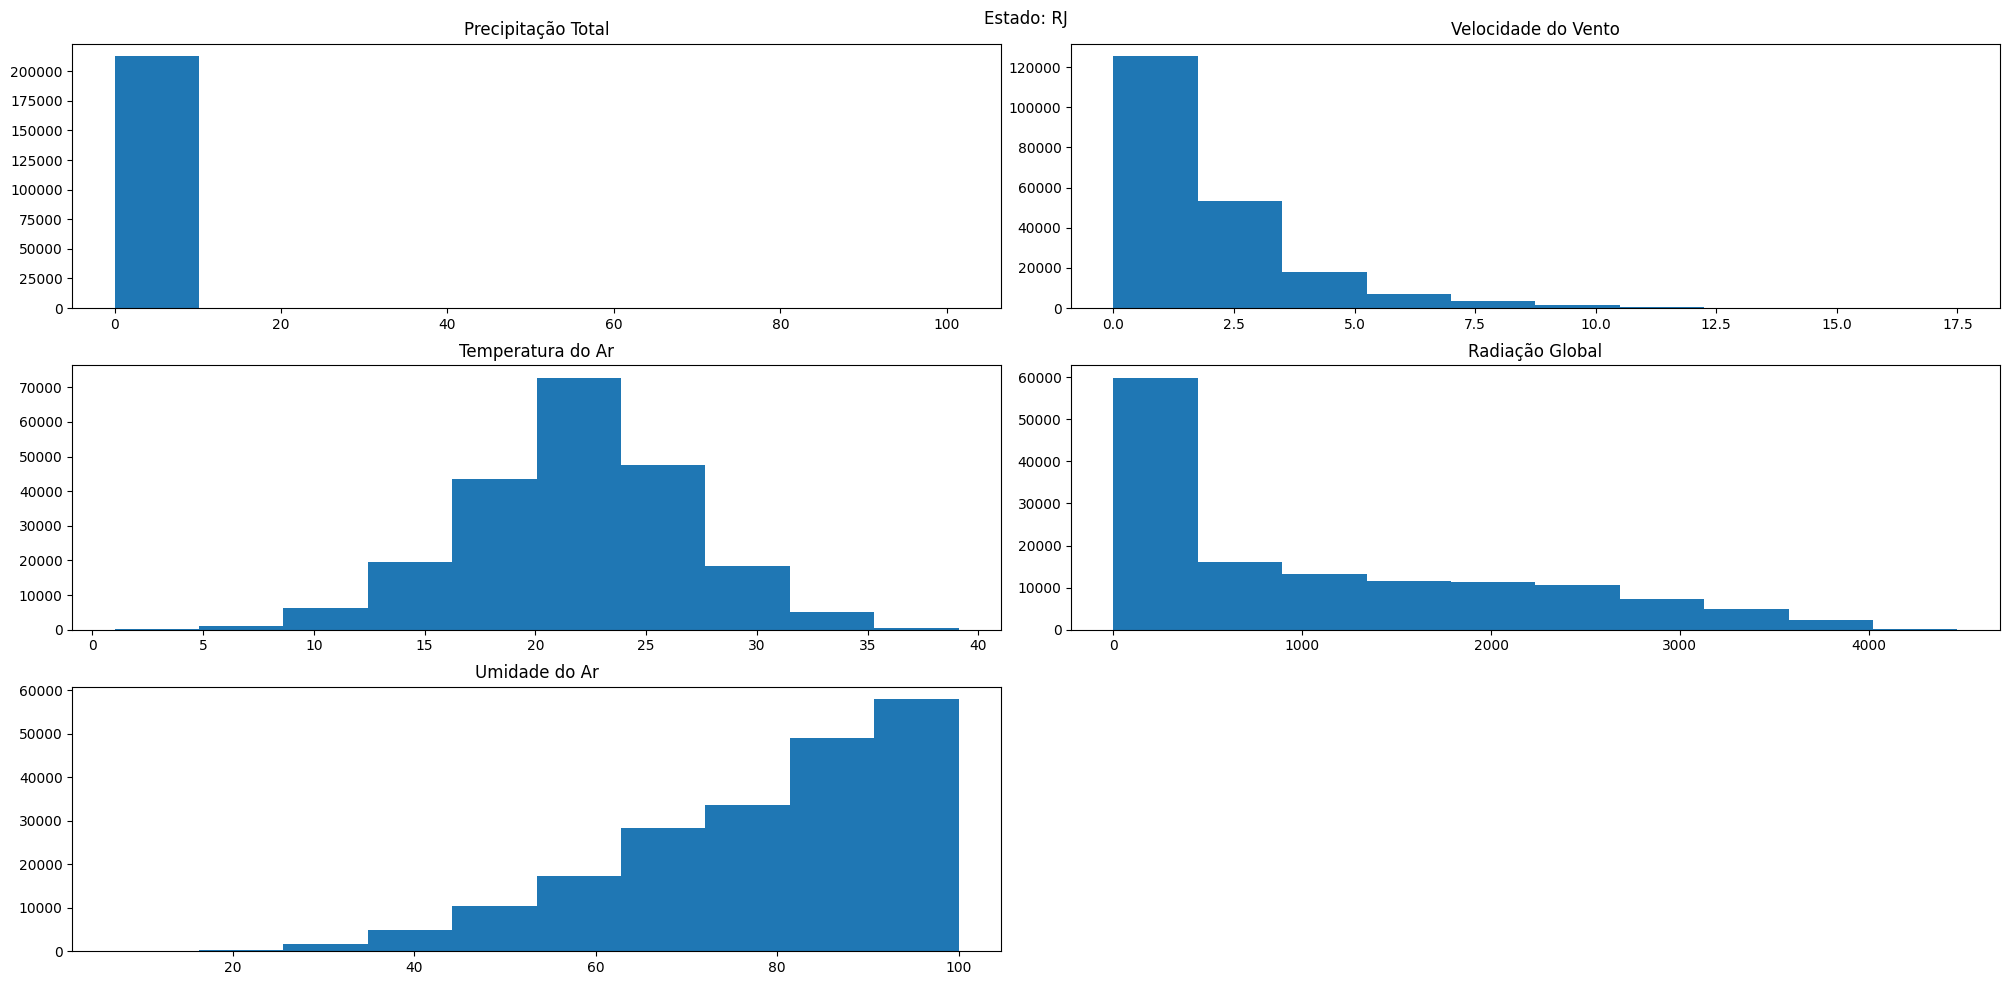

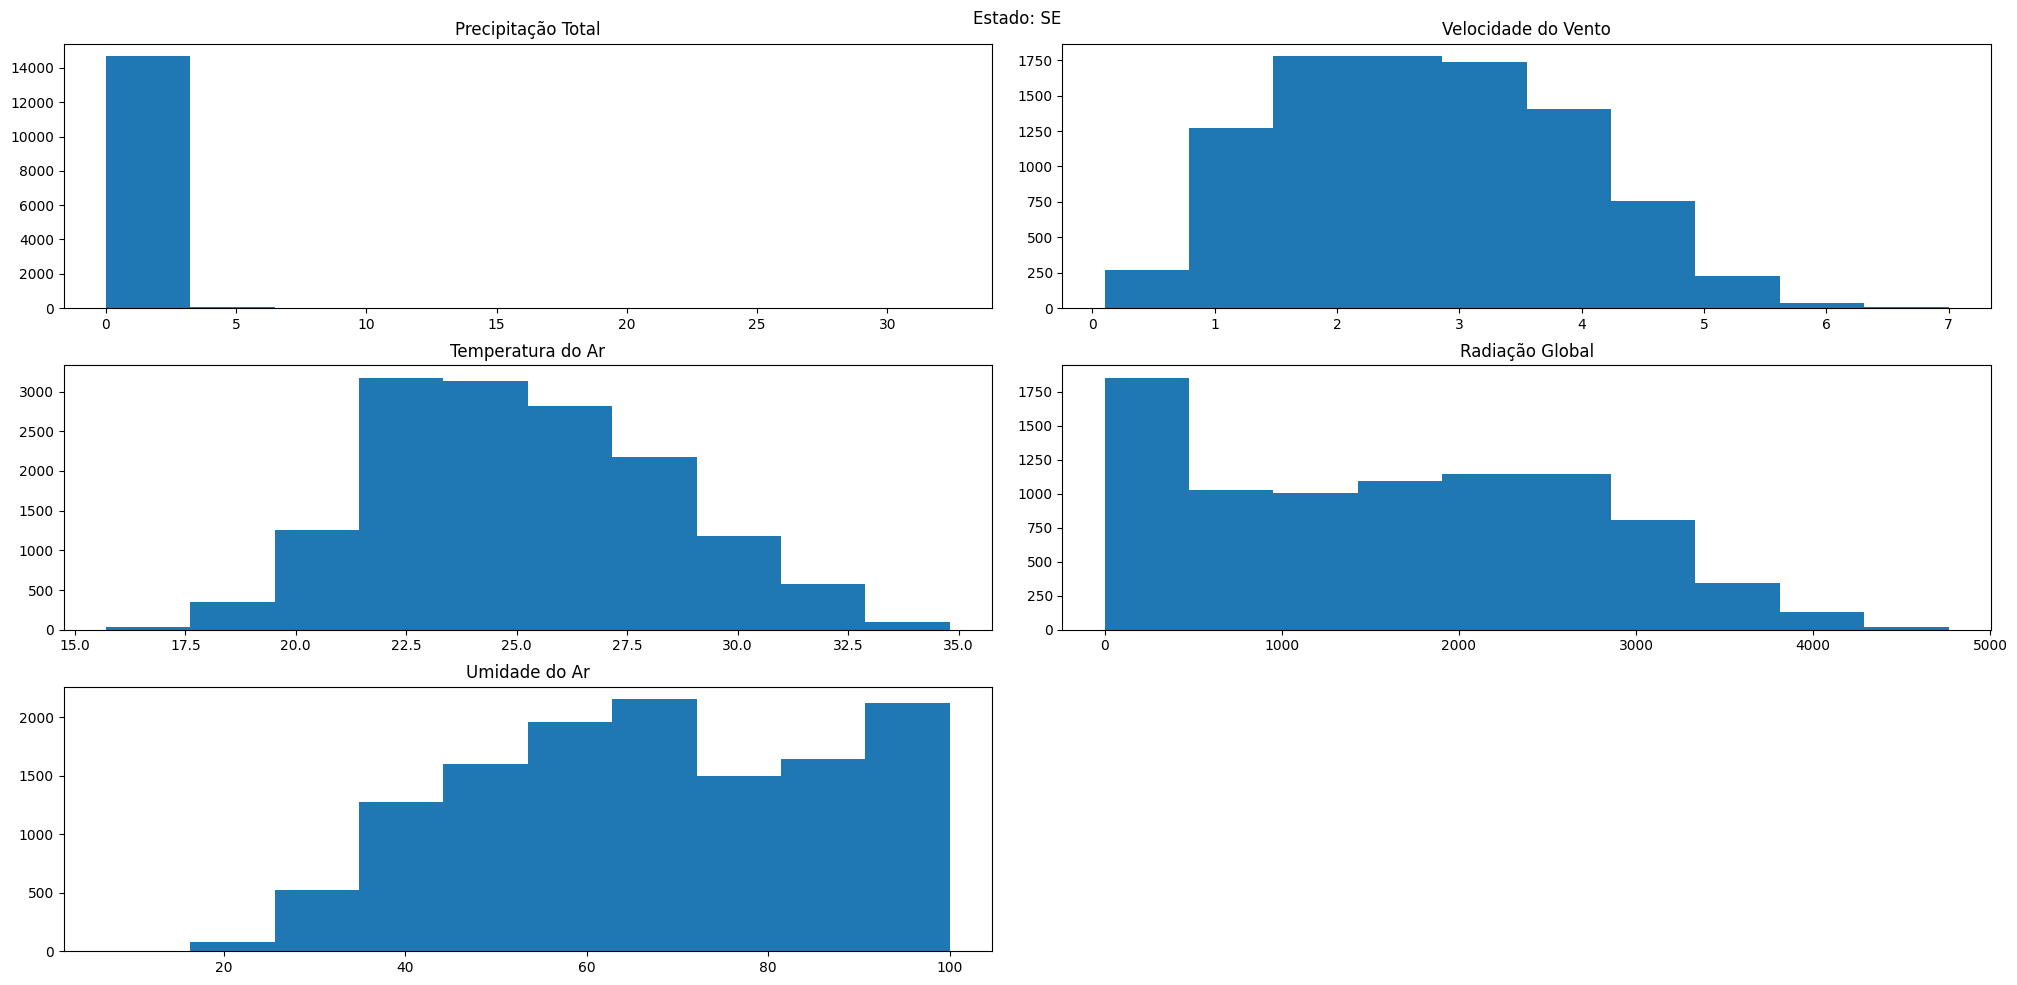

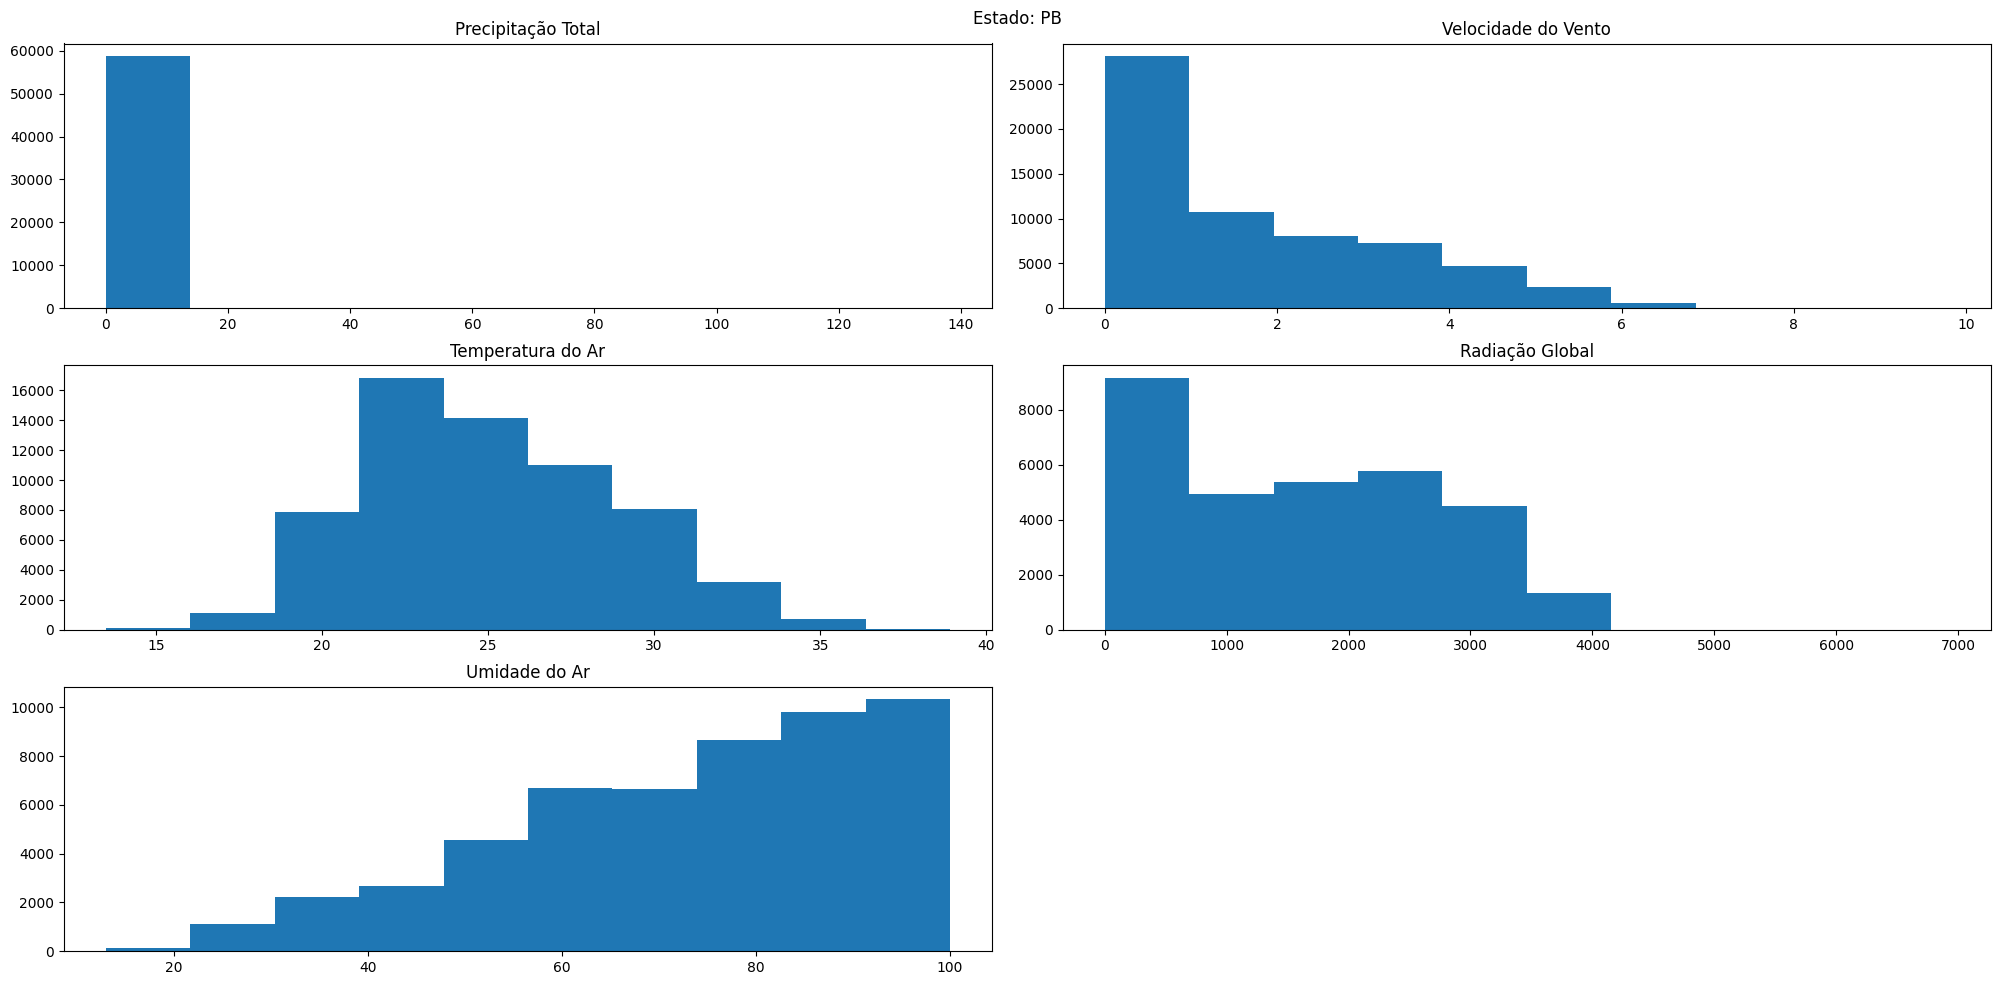

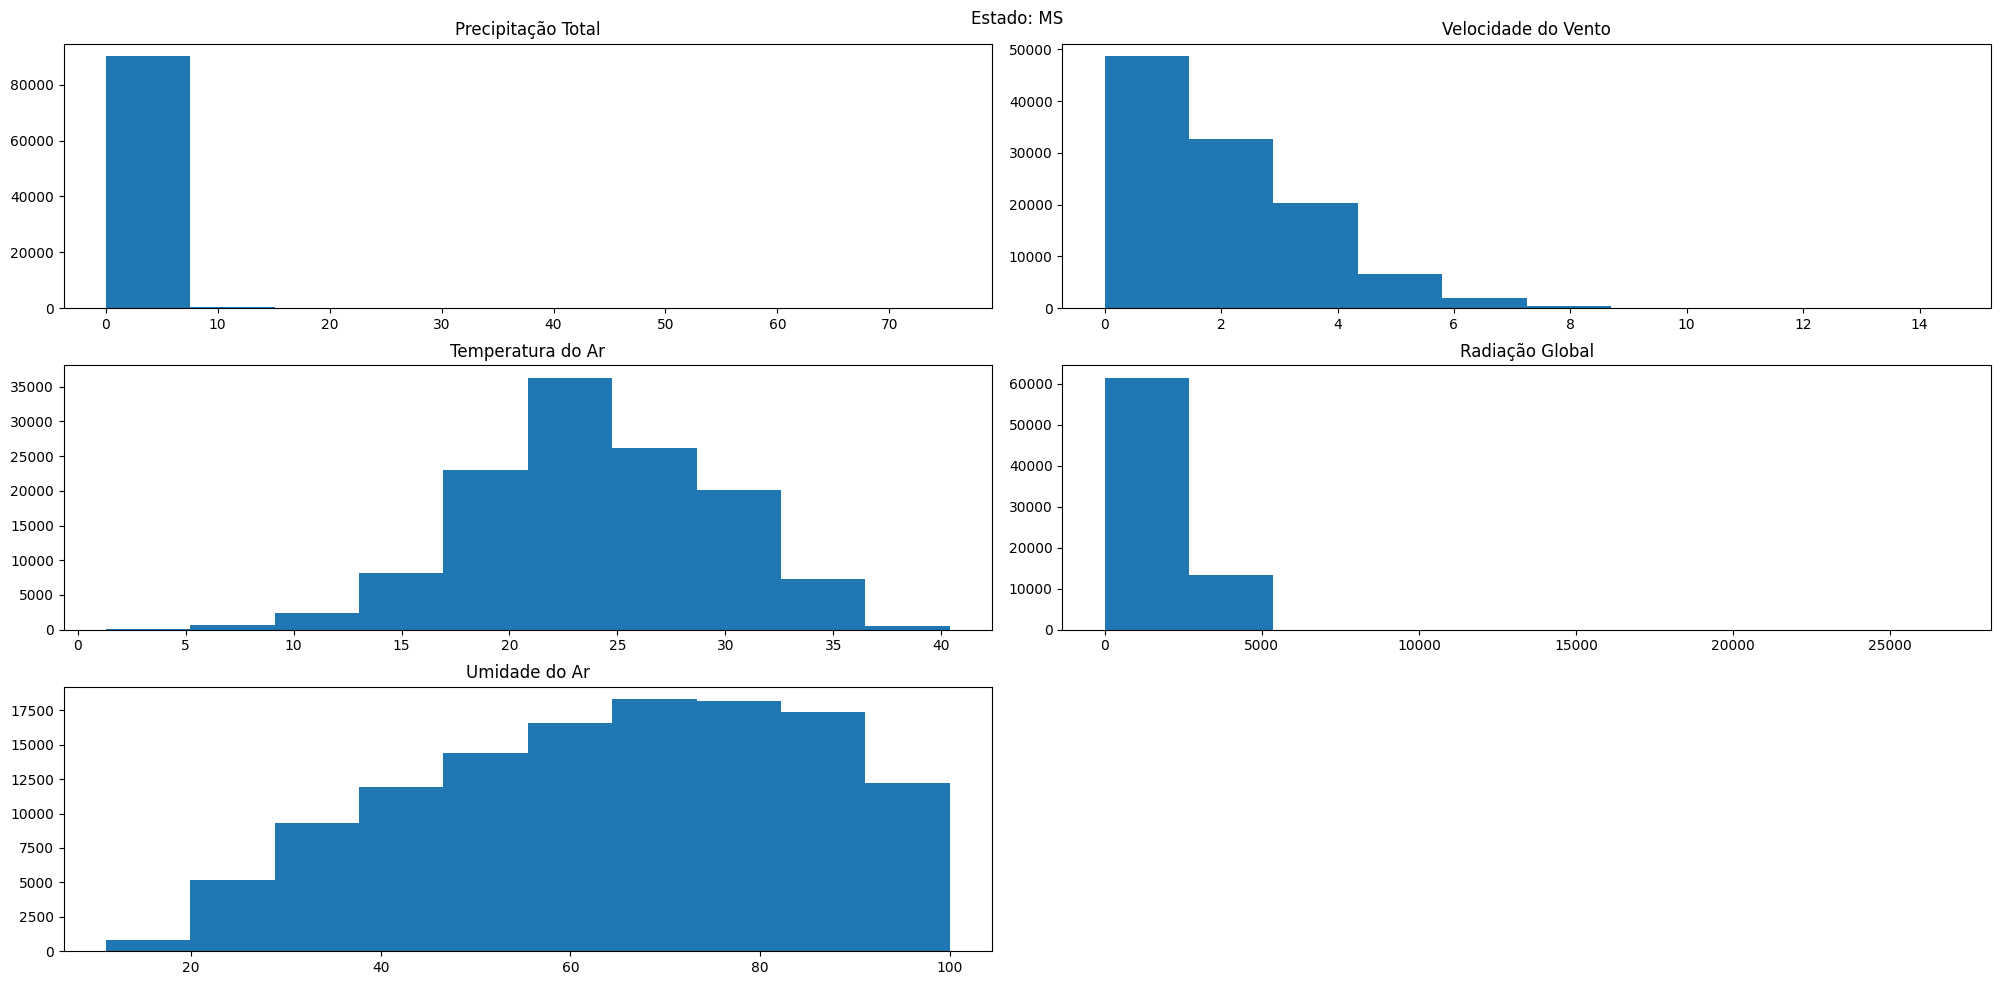

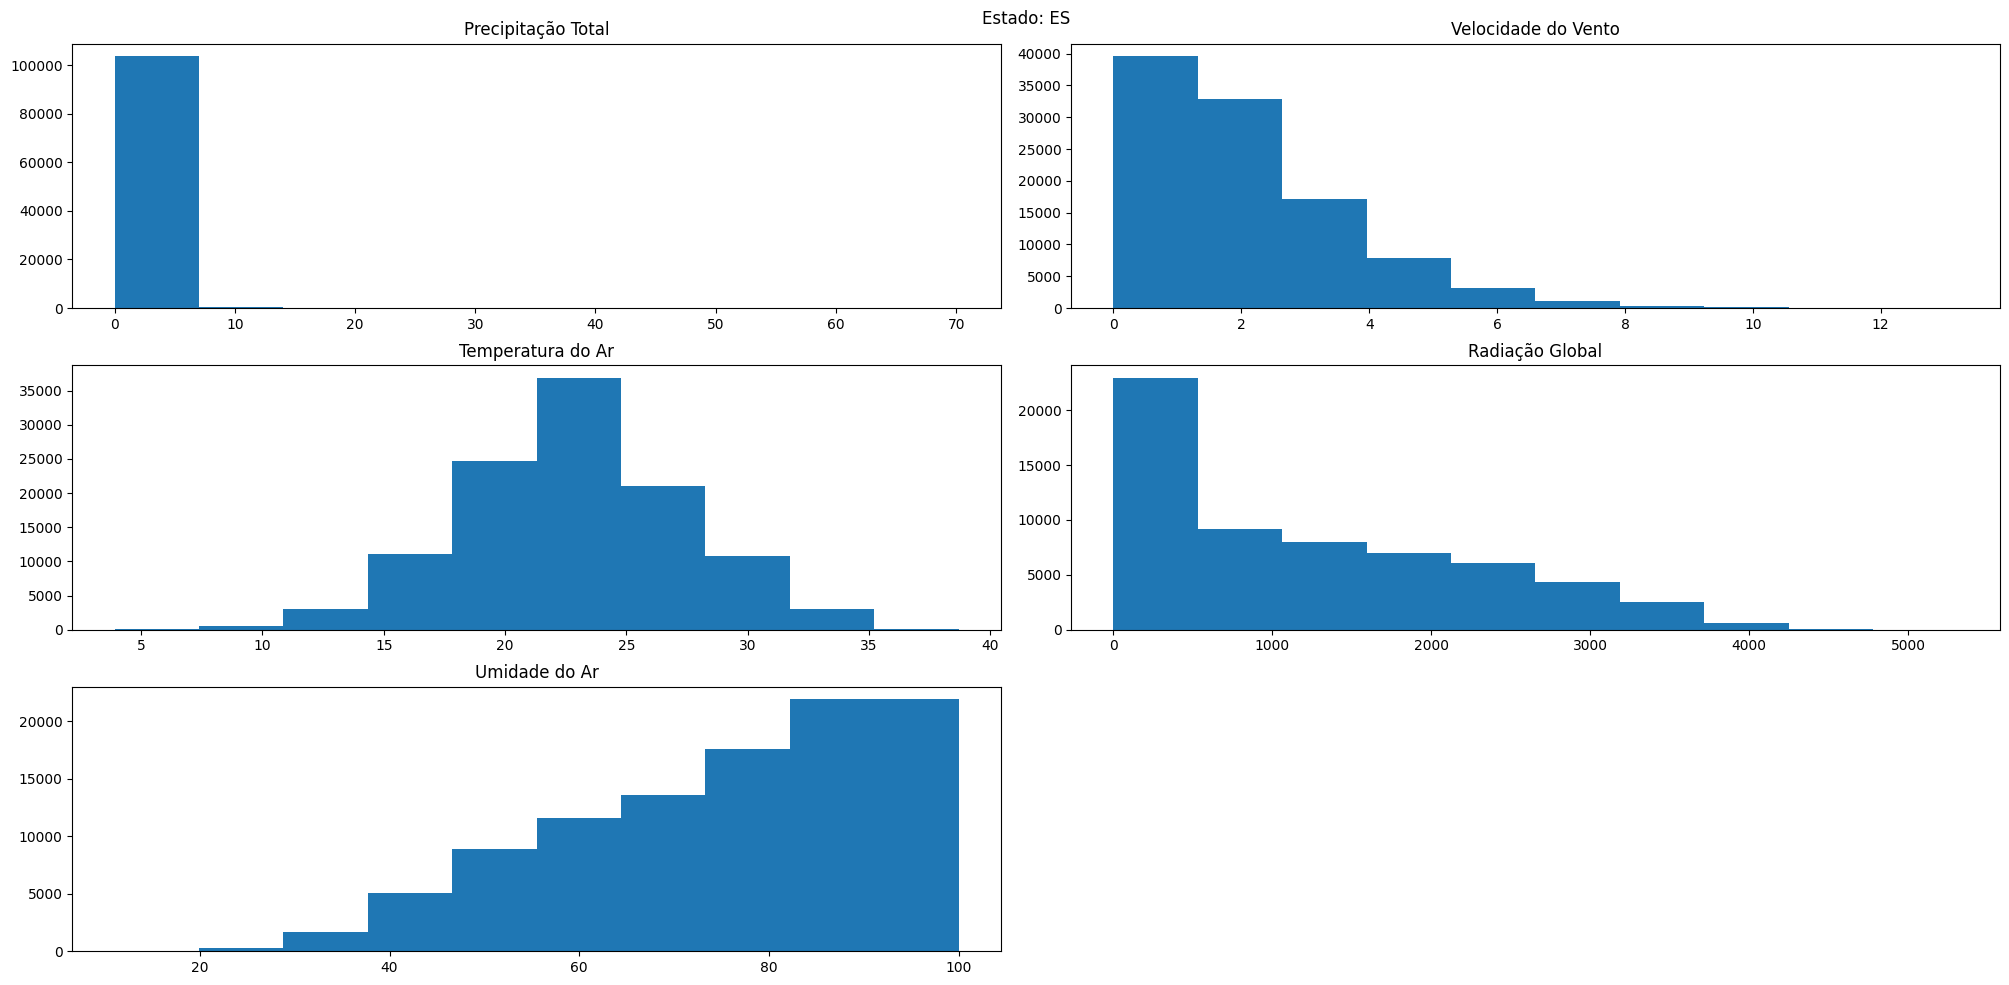

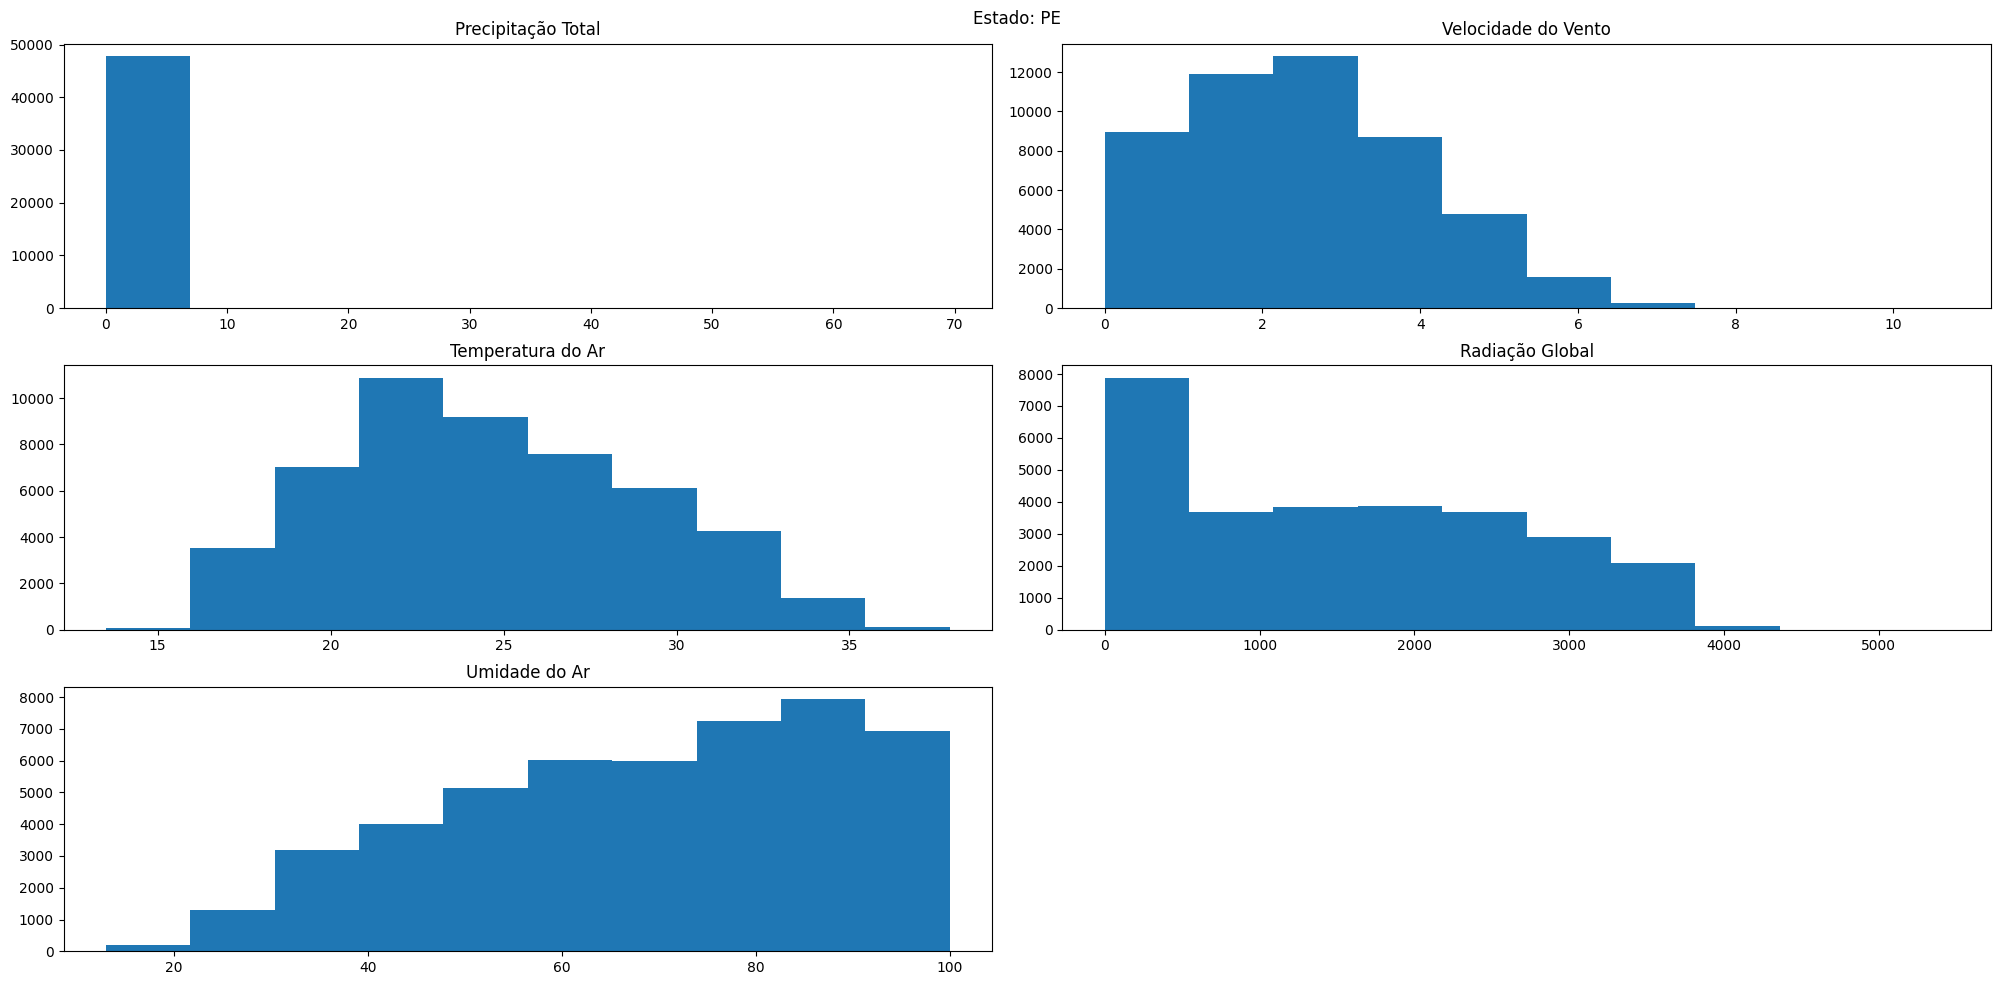

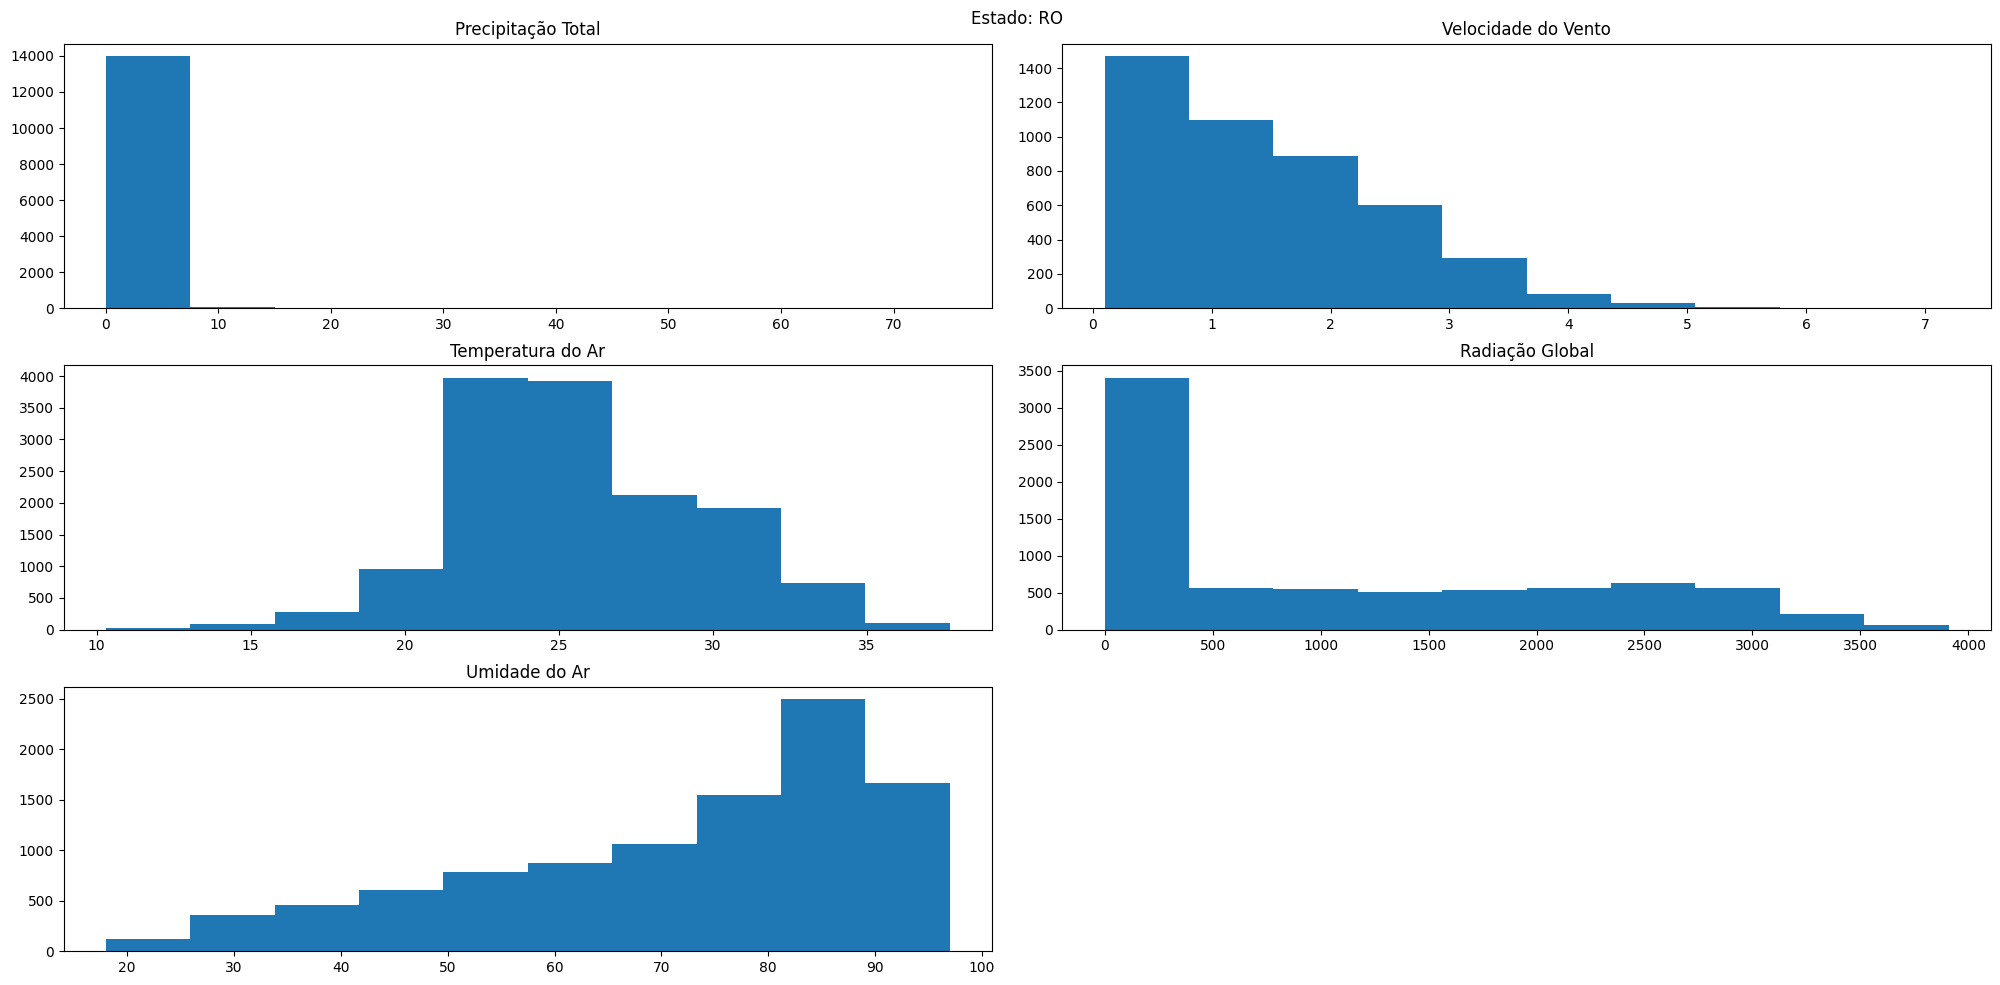

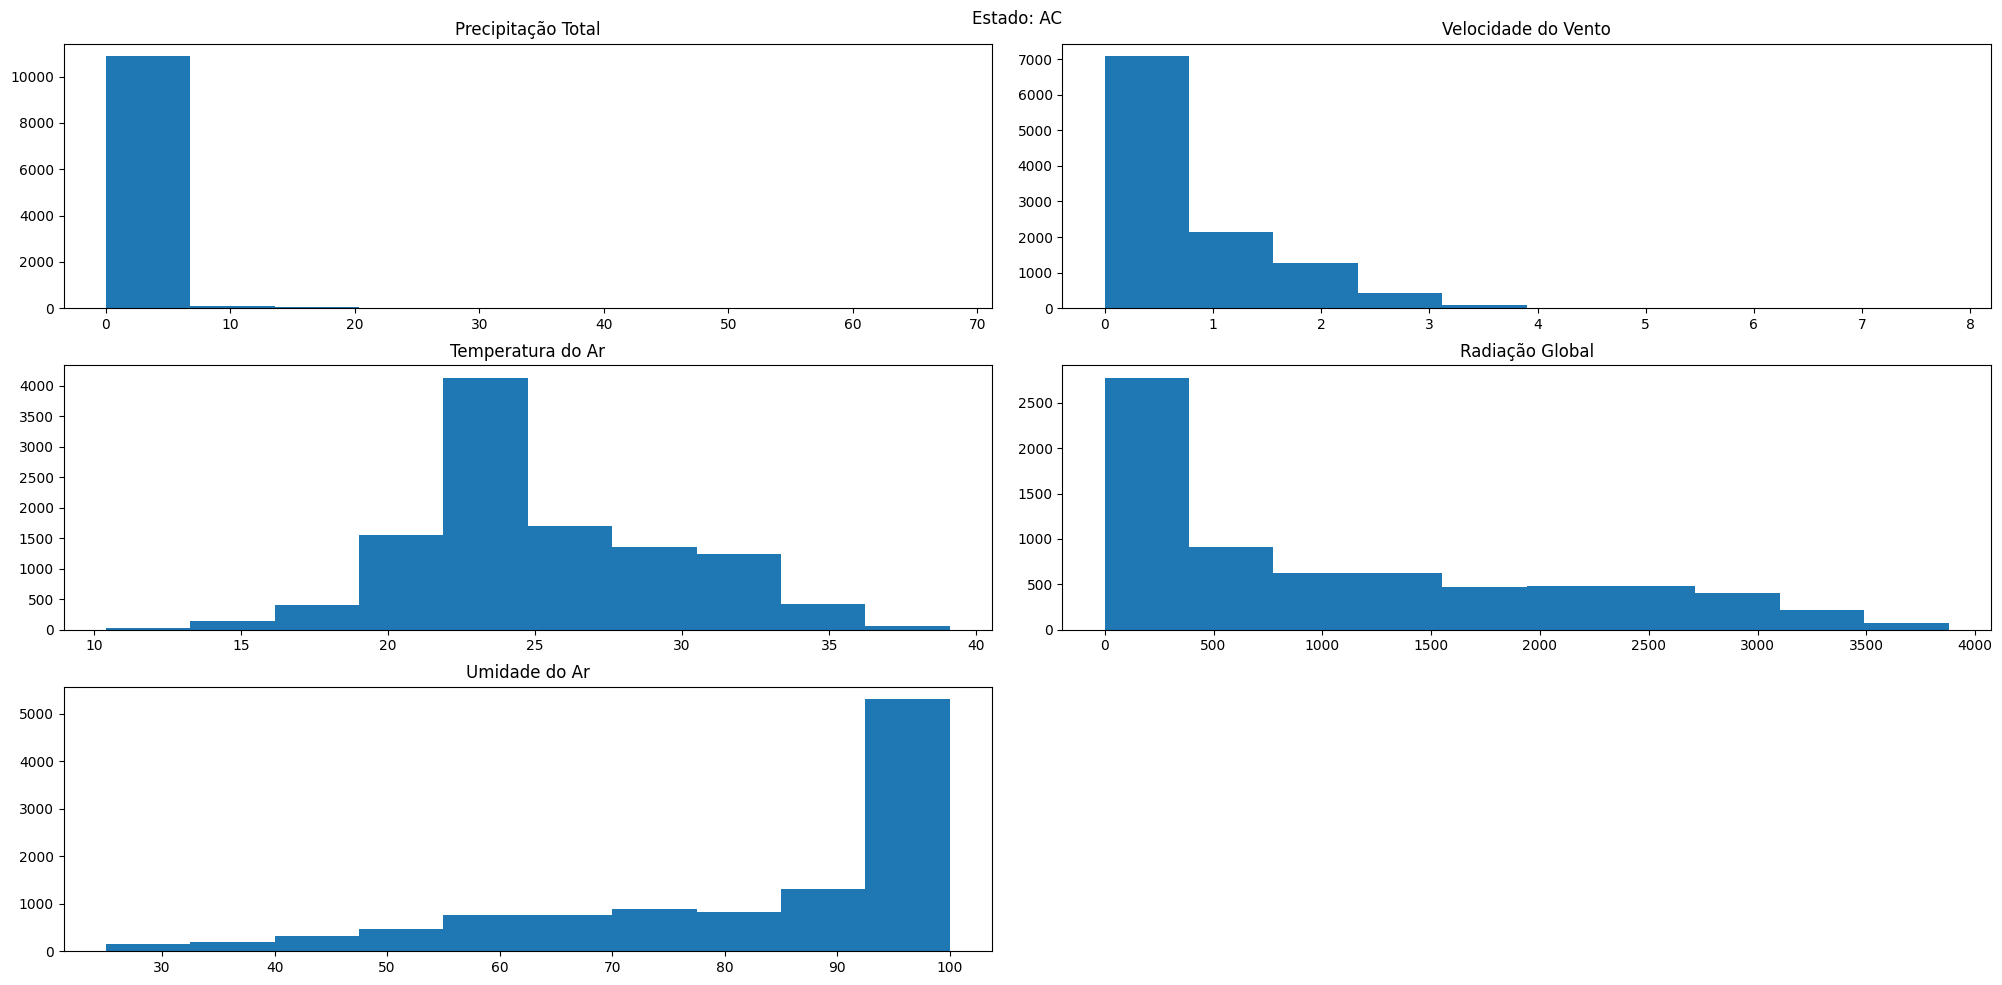

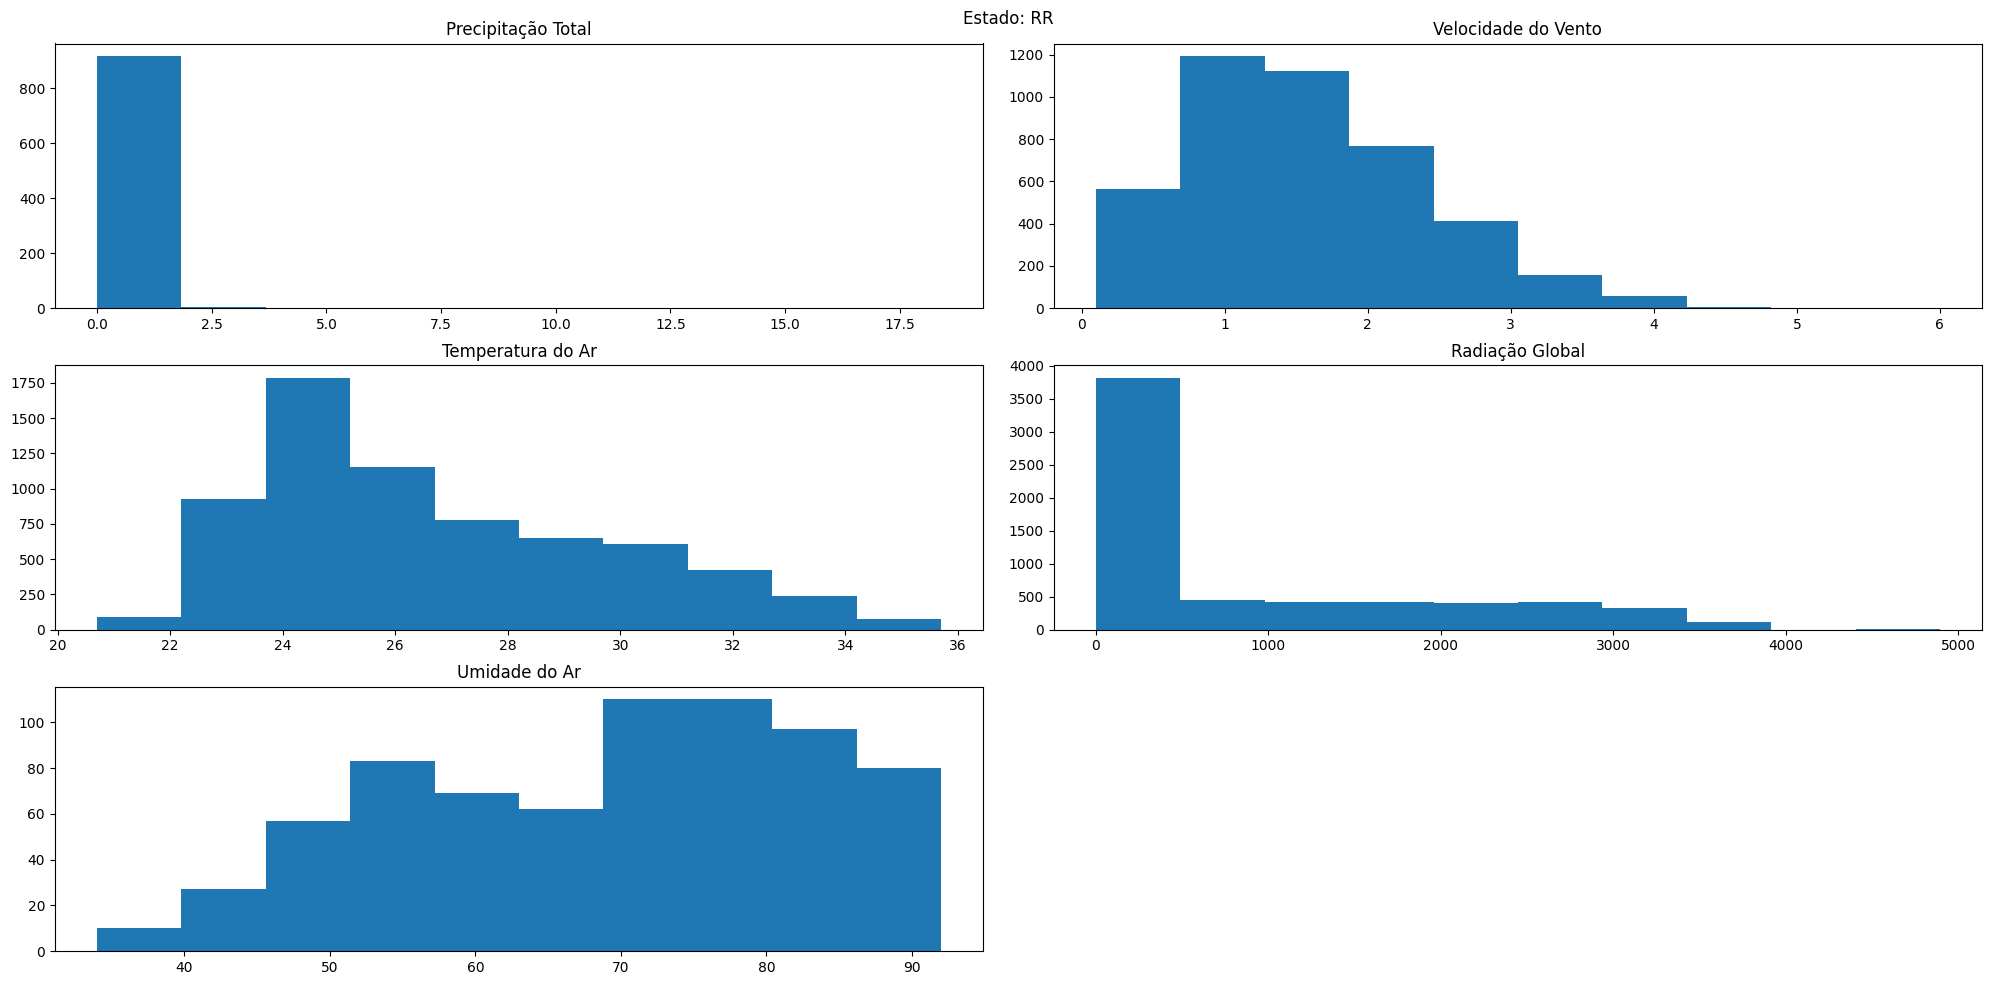

In [9]:
column_mapping = {
    'precipTotalHorario': 'Precipitação Total',
    'ventoVeloHoraria': 'Velocidade do Vento',
    'tempAr': 'Temperatura do Ar',
    'radGlobal': 'Radiação Global',
    'umidRelAr': 'Umidade do Ar',
}

df_station_climate = pd.merge(dim_regiao, fato_dados_metereologicos, left_on='id', right_on='id_regiao')
for uf in df_station_climate['UF'].drop_duplicates().values:
    fig, axs = plt.subplots(3, 2)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    fig.suptitle(f"Estado: {uf}")
    fig.tight_layout(h_pad=2, w_pad=2)

    for i, ax in enumerate(axs.ravel()):
        if i >= len(bar_columns):
            ax.set_axis_off()
            break

        ax.hist(df_station_climate[df_station_climate['UF'] == uf][bar_columns[i]])
        ax.set_title(column_mapping[bar_columns[i]])